<a href="https://colab.research.google.com/github/skhazaei/test/blob/master/diabetes_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Authenticate and create the PyDrive client.

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
id = '1ExjM-usGlSbW2HUexdEFkhfwebr4243-'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('diabetic_data.csv')  

In [5]:
data = pd.read_csv('diabetic_data.csv')

In [6]:
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [7]:
data.shape

(101766, 50)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

**2. Dealing with Duplicate Records :**
We found out that, for some patient there are number of entries in the dataset these duplicate entries are not helpful in solving the task hence we removed these entries.

In [9]:
print('Total data = ', len(data))
print('Unique entries = ', len(np.unique(data['patient_nbr'])))
unique_patients = data.drop_duplicates(['patient_nbr'], keep = 'first')
unique_patients.shape

Total data =  101766
Unique entries =  71518


(71518, 50)

In [10]:
#data.dropna(inplace = True)
#print('Total data = ', len(data))
#print('Unique entries = ', len(np.unique(data['patient_nbr'])))
data.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
#print('Length after removing Duplicates:', len(data))

In [11]:
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,Caucasian,Female,[70-80),?,1,1,7,9,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,443842022,188574944,Other,Female,[40-50),?,1,1,7,14,...,No,Up,No,No,No,No,No,Ch,Yes,>30
101756,443842070,140199494,Other,Female,[60-70),?,1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
101758,443842340,120975314,Caucasian,Female,[80-90),?,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO


**4. Dealing with Missing Values :**
Missing values in this dataset are represented by ‘?’. Only very few of the columns have missing values. These are,
‘race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3'


In [12]:
t = PrettyTable(['Column Name', 'Missing Values', 'Missing Percentage'])
for col in data.columns :
    lenn = len(data[data[col] == '?'])
    t.add_row([col,lenn,lenn / len(data)])
print(t)

+--------------------------+----------------+-----------------------+
|       Column Name        | Missing Values |   Missing Percentage  |
+--------------------------+----------------+-----------------------+
|       encounter_id       |       0        |          0.0          |
|       patient_nbr        |       0        |          0.0          |
|           race           |      1948      |  0.027237898151514305 |
|          gender          |       0        |          0.0          |
|           age            |       0        |          0.0          |
|          weight          |     68665      |   0.960107944853044   |
|    admission_type_id     |       0        |          0.0          |
| discharge_disposition_id |       0        |          0.0          |
|   admission_source_id    |       0        |          0.0          |
|     time_in_hospital     |       0        |          0.0          |
|        payer_code        |     31043      |   0.434058558684527   |
|    medical_special

In [13]:
columns_with_missed_values = data[['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']]

In [14]:
columns_with_missed_values.head(100)

,race,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3
0,Caucasian,?,?,Pediatrics-Endocrinology,250.83,?,?
1,Caucasian,?,?,?,276,250.01,255
2,AfricanAmerican,?,?,?,648,250,V27
3,Caucasian,?,?,?,8,250.43,403
4,Caucasian,?,?,?,197,157,250
...,...,...,...,...,...,...,...
97,Caucasian,?,?,?,414,411,511
98,Other,?,?,Surgery-General,590,250.01,401
99,?,?,?,?,556,285,250
100,Caucasian,?,?,?,410,491,276


**Drop columns that are missing too much data**

In [15]:
data = data.drop(['weight', 'payer_code'], axis=1)

In [16]:
data.shape

(71518, 48)

**Remove null values**
Drop the rows where at least one element is missing.

In [17]:
data.dropna(inplace = True)
print('Total data = ', len(data))

Total data =  71518


In [18]:
t = PrettyTable(['Column Name', 'Missing Values', 'Missing Percentage'])
for col in data.columns :
    lenn = len(data[data[col] == '?'])
    t.add_row([col,lenn,lenn / len(data)])
print(t)

+--------------------------+----------------+-----------------------+
|       Column Name        | Missing Values |   Missing Percentage  |
+--------------------------+----------------+-----------------------+
|       encounter_id       |       0        |          0.0          |
|       patient_nbr        |       0        |          0.0          |
|           race           |      1948      |  0.027237898151514305 |
|          gender          |       0        |          0.0          |
|           age            |       0        |          0.0          |
|    admission_type_id     |       0        |          0.0          |
| discharge_disposition_id |       0        |          0.0          |
|   admission_source_id    |       0        |          0.0          |
|     time_in_hospital     |       0        |          0.0          |
|    medical_specialty     |     34477      |   0.4820744427976174  |
|    num_lab_procedures    |       0        |          0.0          |
|      num_procedure

In [19]:
print(data.shape)
print('% data retained out of unique patients: ' + str(round(len(data.index)/71518 * 100,2)) + '%')
print('% data retained out of all encounters: ' + str(round(len(data.index)/101766 * 100,2)) + '%')
print(data.columns)

(71518, 48)
% data retained out of unique patients: 100.0%
% data retained out of all encounters: 70.28%
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtyp

**Drop other columns without relevant information**

In [20]:
data = data.drop(['encounter_id', 'patient_nbr'], axis=1)
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [21]:
data.shape

(71518, 46)

**1. Age Feature :**
The values of age are given like [0–10),[10–20),[20–30) The age feature is not categorical but ordinal and hence we should convert it to numbers and treat it as numeric feature. We are converting age feature to numeric feature like below,
[0–10) → 5, [10–20) → 15, [20–30) — -> 25

In [22]:
replaceDict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25, 
'[30-40)' : 35, 
'[40-50)' : 45, 
'[50-60)' : 55,
'[60-70)' : 65, 
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

data['age'] = data['age'].apply(lambda x : replaceDict[x])
print(data['age'].head())

0     5
1    15
2    25
3    35
4    45
Name: age, dtype: int64


**6.2) Using domain knowledge on diag_1, diag_2, diag_3 :**
The diag_1 , diag_2 , diag_3 are categorical features but these features have lots unique values if we apply one hot encoding directly it will results in lots of features that will eventually invoke “curse of dimensionality” problem We will use the domain knowledge provided in the description file to create fewer categories.



1.   Circulatory → 390–459, 785 → Diseases of the circulatory system
2.   Respiratory → 460–519, 786 → Diseases of the respiratory system
3.   Digestive → 520–579, 787 → Diseases of the digestive system
4.   Diabetes → 250.xx → Diabetes mellitus
5.   Injury → 800–999 → Injury and poisoning
6.   Musculoskeletal → 710–739 → Diseases of the musculoskeletal system and connective tissue
7.   Genitourinary → 580–629, 788 → Diseases of the genitourinary system
8.   Neoplasms → 140–239 → Neoplasms
9.   Pregnecy → 630–679 → Complications of pregnancy, childbirth, and the puerperium
10.  Other

We added Pregnancy as one category original description file kept it in ‘Other’ category but from research we found that Pregnancy creates unique type of diabetes and hence it make sense to keep it as separate category.


In [23]:
print(len((data['diag_1'])))  
print(len(np.unique(data['diag_1'])))  
print(len((data['diag_2'])))  
print(len(np.unique(data['diag_2'])))  
print(len((data['diag_3'])))  
print(len(np.unique(data['diag_3'])))  

71518
697
71518
726
71518
759


In [24]:
data['diag_1']

0         250.83
1            276
2            648
3              8
4            197
           ...  
101754       574
101755       592
101756       996
101758       292
101765       530
Name: diag_1, Length: 71518, dtype: object

In [25]:
data['diag_2']

0              ?
1         250.01
2            250
3         250.43
4            157
           ...  
101754       574
101755       599
101756       585
101758         8
101765       530
Name: diag_2, Length: 71518, dtype: object

Lets deal with diag_1 , diag_2 and diag_3 one by one

As featues diag_1 , diag_2, diag_3 have mixed type values like 11, 'V25' 'V26' 'V43' So we here cant apply class mean, median so lets try replacing missing valuse with most common value

In [26]:
diag_1 = Counter(list(data['diag_1'])).most_common(1)[0][0]
diag_2 = Counter(list(data['diag_2'])).most_common(1)[0][0]
diag_3 = Counter(list(data['diag_3'])).most_common(1)[0][0]
data['diag_1'] = data['diag_1'].apply(lambda x : diag_1 if x == '?' else x)
data['diag_2'] = data['diag_2'].apply(lambda x : diag_2 if x == '?' else x)
data['diag_3'] = data['diag_3'].apply(lambda x : diag_3 if x == '?' else x)

In [27]:
data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,5,6,25,1,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,15,1,1,7,3,?,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,25,1,1,7,2,?,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,35,1,1,7,2,?,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,45,1,1,7,1,?,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,75,1,1,7,9,?,50,2,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,Other,Female,45,1,1,7,14,?,73,6,...,No,Up,No,No,No,No,No,Ch,Yes,>30
101756,Other,Female,65,1,1,7,2,?,46,6,...,No,Steady,No,No,No,No,No,No,Yes,>30
101758,Caucasian,Female,85,1,1,7,5,?,76,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO


The diag_1 , diag_2 , diag_3 are categorical features but they have lots unique values if we apply one hot encoding directely it will results in lots of feature values that will eventually invoke "curse of dimensionality" problem We will use the domain knowledge provided in the description of data to create fewer values.

In [28]:
t = PrettyTable(['Column Name', 'Missing Values', 'Missing Percentage'])
for col in data.columns :
    lenn = len(data[data[col] == '?'])
    t.add_row([col,lenn,lenn / len(data)])
print(t)

+--------------------------+----------------+----------------------+
|       Column Name        | Missing Values |  Missing Percentage  |
+--------------------------+----------------+----------------------+
|           race           |      1948      | 0.027237898151514305 |
|          gender          |       0        |         0.0          |
|           age            |       0        |         0.0          |
|    admission_type_id     |       0        |         0.0          |
| discharge_disposition_id |       0        |         0.0          |
|   admission_source_id    |       0        |         0.0          |
|     time_in_hospital     |       0        |         0.0          |
|    medical_specialty     |     34477      |  0.4820744427976174  |
|    num_lab_procedures    |       0        |         0.0          |
|      num_procedures      |       0        |         0.0          |
|     num_medications      |       0        |         0.0          |
|    number_outpatient     |      

In [29]:
columns_with_missed_values = data[['race', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']]

In [30]:
columns_with_missed_values

,race,medical_specialty,diag_1,diag_2,diag_3
0,Caucasian,Pediatrics-Endocrinology,250.83,250,250
1,Caucasian,?,276,250.01,255
2,AfricanAmerican,?,648,250,V27
3,Caucasian,?,8,250.43,403
4,Caucasian,?,197,157,250
...,...,...,...,...,...
101754,Caucasian,?,574,574,250.02
101755,Other,?,592,599,518
101756,Other,?,996,585,403
101758,Caucasian,?,292,8,304


In [31]:
# Replace diagnoses with category names
#Circulatory: 390-459, 785
#Respiratory: 460-519, 786
#Digestive: 520-579, 787
#Diabetes: 250.xx
#Injury: 800-999
#Musculoskeletal: 710-739
#Genitourinary: 580-629, 788
#Neoplasms: 140-239, 
#Other: 
#780, 781, 784, 790-799, 240-279 except 250, 680-709, 782, 001-139, 290-319
#E-V (beginning with a letter), 280-289, 320-359, 630-679, 360-389, 740-759

def categorize_diagnosis(diag):
    if diag.isnumeric():
        diag = int(diag)
        if diag in range(390,460) or diag==785:
            return 'Circulatory'
        elif diag in range(460,520) or diag==786:
            return 'Respiratory'
        elif diag in range(520,580) or diag==787:
            return 'Digestive'
        elif diag in np.arange(250,260,0.01):
            return 'Diabetes'
        elif diag in range(800,1000):
            return 'Injury'
        elif diag in range(710,740):
            return  'Musculoskeletal'
        elif diag in range(580,630) or diag==788:
            return  'Genitourinary'
        elif diag in range(140,240):
            return  'Neoplasms'
        else:
            return 'Other'
    else:
        if "250" in diag:
            return 'Diabetes'
        else:
            return  'Other'

In [32]:
data['diag_1_desc'] = data.apply(lambda row: categorize_diagnosis(row['diag_1']), axis=1)
data['diag_2_desc'] = data.apply(lambda row: categorize_diagnosis(row['diag_2']), axis=1)
data['diag_3_desc'] = data.apply(lambda row: categorize_diagnosis(row['diag_3']), axis=1)

# Remove original diagnosis features
data.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True)
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'diag_1_desc', 'diag_2_desc', 'diag_3_desc'],
      dtype='object')

In [33]:
data.shape

(71518, 46)

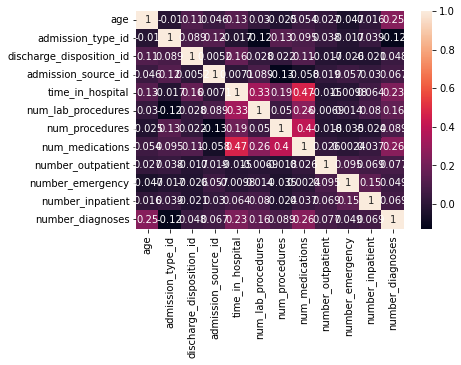

In [34]:
# corr matrix
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [35]:
t = PrettyTable(['Column Name', 'Missing Values', 'Missing Percentage'])
for col in data.columns :
    lenn = len(data[data[col] == '?'])
    t.add_row([col,lenn,lenn / len(data)])
print(t)

+--------------------------+----------------+----------------------+
|       Column Name        | Missing Values |  Missing Percentage  |
+--------------------------+----------------+----------------------+
|           race           |      1948      | 0.027237898151514305 |
|          gender          |       0        |         0.0          |
|           age            |       0        |         0.0          |
|    admission_type_id     |       0        |         0.0          |
| discharge_disposition_id |       0        |         0.0          |
|   admission_source_id    |       0        |         0.0          |
|     time_in_hospital     |       0        |         0.0          |
|    medical_specialty     |     34477      |  0.4820744427976174  |
|    num_lab_procedures    |       0        |         0.0          |
|      num_procedures      |       0        |         0.0          |
|     num_medications      |       0        |         0.0          |
|    number_outpatient     |      

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71518 non-null  object
 1   gender                    71518 non-null  object
 2   age                       71518 non-null  int64 
 3   admission_type_id         71518 non-null  int64 
 4   discharge_disposition_id  71518 non-null  int64 
 5   admission_source_id       71518 non-null  int64 
 6   time_in_hospital          71518 non-null  int64 
 7   medical_specialty         71518 non-null  object
 8   num_lab_procedures        71518 non-null  int64 
 9   num_procedures            71518 non-null  int64 
 10  num_medications           71518 non-null  int64 
 11  number_outpatient         71518 non-null  int64 
 12  number_emergency          71518 non-null  int64 
 13  number_inpatient          71518 non-null  int64 
 14  number_diagnoses     

**3- Drop encounters that resulted in discharge due to hospice or patient death**
Discharge Disposition ID corresponding to [11 or 13 or 14 or 19 or 20 or 21] indicates patient has expired so there is no chance that it will readmit again so we will remove these records.

Discharge Disposition ID has lots of distinct values using domain knowledge we will convert them into small number of categories. 

ddi_cat1 = [6, 8, 9, 13] 
ddi_cat2 = [3, 4, 5, 14, 22, 23, 24] 
ddi_cat10 = [12, 15, 16, 17] 
ddi_cat11 = [19, 20, 21] 
ddi_cat18 = [25, 26]

In [37]:
data['discharge_disposition_id'] = data['discharge_disposition_id'].apply(lambda x : 1 if int(x) in [6, 8, 9, 13] 
                                                                           else ( 2 if int(x) in [3, 4, 5, 14, 22, 23, 24]
                                                                           else ( 10 if int(x) in [12, 15, 16, 17]
                                                                           else ( 11 if int(x) in [19, 20, 21]
                                                                           else ( 18 if int(x) in [25, 26] 
                                                                           else int(x) )))))

data = data[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

Admission Type ID :

Similarly Admission Type ID can be converted into small number of categories 
ati_cat1 = [2, 7] 
ati_cat5 = [6, 8]

In [38]:
data['admission_type_id'] = data['admission_type_id'].apply(lambda x : 1 if int(x) in [2, 7]
                                                            else ( 5 if int(x) in [6, 8]
                                                            else int(x) ))

Admission Source ID :

Similarly Admission Source ID can be converted into small number of categories 
asi_cat1 = [2, 3] 
ati_cat4 = [5, 6, 10, 22, 25] 
ati_cat9 = [15, 17, 20, 21] 
ati_cat11 = [13, 17]

In [39]:
data['admission_source_id'] = data['admission_source_id'].apply(lambda x : 1 if int(x) in [2, 3]
                                                            else ( 4 if int(x) in [5, 6, 10, 22, 25]
                                                            else ( 9 if int(x) in [15, 17, 20, 21]
                                                            else ( 11 if int(x) in [13, 14]
                                                            else int(x) ))))

In [40]:
id2 = '1P9utjV8bW_-2jlJjLXpF-h_HqiyOhPUz'
downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('discharge.csv')  

In [41]:
discharge = pd.read_csv("discharge.csv")
discharge

,discharge_disposition_id,description
0,0,ignore
1,1,Discharged to home
2,2,Discharged/transferred to another short term h...
3,3,Discharged/transferred to SNF
4,4,Discharged/transferred to ICF
5,5,Discharged/transferred to another type of inpa...
6,6,Discharged/transferred to home with home healt...
7,7,Left AMA
8,8,Discharged/transferred to home under care of H...
9,9,Admitted as an inpatient to this hospital


In [42]:
id3 = '1CWdb1VPP3PNQIoPKbK0yHxXTygCpvj1l'
downloaded = drive.CreateFile({'id':id3}) 
downloaded.GetContentFile('admission_type.csv')  

In [43]:
admission_type = pd.read_csv("admission_type.csv")

In [44]:
admission_type

,admission_type_id,description
0,0,ignore
1,1,Emergency
2,2,Urgent
3,3,Elective
4,4,Newborn
5,5,Not Available
6,6,NaN
7,7,Trauma Center
8,8,Not Mapped


In [45]:
id4 = '1yA37H6wjJwmlKiJfRTWHGBlXXRJ3VpY_'
download = drive.CreateFile({'id': id4})
download.GetContentFile("admission_source.csv")

In [46]:
admission_source = pd.read_csv("admission_source.csv")
admission_source

,admission_source_id,description
0,0,ignore
1,1,Physician Referral
2,2,Clinic Referral
3,3,HMO Referral
4,4,Transfer from a hospital
5,5,Transfer from a Skilled Nursing Facility (SNF)
6,6,Transfer from another health care facility
7,7,Emergency Room
8,8,Court/Law Enforcement
9,9,Not Available


**Add Three Columns of for IDs Mapping **

admission type, admission source, discharge disposition

In [47]:
data['admission_type'] = data['admission_type_id'].map(admission_type['description'])

In [48]:
data[['admission_type', 'admission_type_id']]

,admission_type,admission_type_id
0,Not Available,5
1,Emergency,1
2,Emergency,1
3,Emergency,1
4,Emergency,1
...,...,...
101754,Emergency,1
101755,Emergency,1
101756,Emergency,1
101758,Emergency,1


In [49]:
data['admission_source'] = data['admission_source_id'].map(admission_source['description'])

In [50]:
data[['admission_source', 'admission_source_id']]

,admission_source,admission_source_id
0,Physician Referral,1
1,Emergency Room,7
2,Emergency Room,7
3,Emergency Room,7
4,Emergency Room,7
...,...,...
101754,Emergency Room,7
101755,Emergency Room,7
101756,Emergency Room,7
101758,Emergency Room,7


In [51]:
data['discharge_disposition'] = data['discharge_disposition_id'].map(discharge['description']) 

In [52]:
data[['discharge_disposition', 'discharge_disposition_id']]

,discharge_disposition,discharge_disposition_id
0,NaN,18
1,Discharged to home,1
2,Discharged to home,1
3,Discharged to home,1
4,Discharged to home,1
...,...,...
101754,Discharged to home,1
101755,Discharged to home,1
101756,Discharged to home,1
101758,Discharged to home,1


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70434 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      70434 non-null  object
 1   gender                    70434 non-null  object
 2   age                       70434 non-null  int64 
 3   admission_type_id         70434 non-null  int64 
 4   discharge_disposition_id  70434 non-null  int64 
 5   admission_source_id       70434 non-null  int64 
 6   time_in_hospital          70434 non-null  int64 
 7   medical_specialty         70434 non-null  object
 8   num_lab_procedures        70434 non-null  int64 
 9   num_procedures            70434 non-null  int64 
 10  num_medications           70434 non-null  int64 
 11  number_outpatient         70434 non-null  int64 
 12  number_emergency          70434 non-null  int64 
 13  number_inpatient          70434 non-null  int64 
 14  number_diagnoses     

In [54]:
data.shape

(70434, 49)

In [55]:
data.shape

(70434, 49)

lets analyse each and every feature one by one : lets remove them

In [56]:
data.drop(data[data.gender == 'Unknown/Invalid'].index, inplace = True)

Glucose Serum test : 
A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes. 

'>200' : 200 = indicates diabetes 
'>300' : 300 = Indicates diabetes 
'Norm' : 100 = Normal 
'None' : 0 = test was not taken 

In [57]:
data['max_glu_serum'] = data['max_glu_serum'].apply(lambda x : 200 if x == '>200' 
                                                            else ( 300 if x == '>300'                                                          
                                                            else ( 100 if x == 'Norm'
                                                            else  0)))

A1C test : 
An A1C test is a blood test that reflects your average blood glucose levels over the past 3 months 

'>7' : 7 
'>8' : 8 
Norm : 5 = Normal 
None : 0 = Test was not taken

In [58]:
data['A1Cresult'] = data['A1Cresult'].apply(lambda x : 7 if x == '>7' 
                                                         else (8 if  x == '>8'                                                        
                                                         else ( 5 if x == 'Norm'
                                                         else  0)))

In [59]:
data['change'] = data['change'].apply(lambda x : 1 if x == 'Ch'
                                                 else -1)

In [60]:
data['diabetesMed'] = data['diabetesMed'].apply(lambda x : -1 if x == 'No'
                                                else 1)

In [61]:
data['race'] = data['race'].apply(lambda x : np.nan if x == '?' else x)
data["race"].fillna(data["race"].mode()[0], inplace = True)

In [62]:
data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_desc,diag_2_desc,diag_3_desc,admission_type,admission_source,discharge_disposition
0,Caucasian,Female,5,5,18,1,1,Pediatrics-Endocrinology,41,0,...,No,-1,-1,NO,Diabetes,Diabetes,Diabetes,Not Available,Physician Referral,NaN
1,Caucasian,Female,15,1,1,7,3,?,59,0,...,No,1,1,>30,Other,Diabetes,Other,Emergency,Emergency Room,Discharged to home
2,AfricanAmerican,Female,25,1,1,7,2,?,11,5,...,No,-1,1,NO,Other,Diabetes,Other,Emergency,Emergency Room,Discharged to home
3,Caucasian,Male,35,1,1,7,2,?,44,1,...,No,1,1,NO,Other,Diabetes,Circulatory,Emergency,Emergency Room,Discharged to home
4,Caucasian,Male,45,1,1,7,1,?,51,0,...,No,1,1,NO,Neoplasms,Neoplasms,Diabetes,Emergency,Emergency Room,Discharged to home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,75,1,1,7,9,?,50,2,...,No,1,1,>30,Digestive,Digestive,Diabetes,Emergency,Emergency Room,Discharged to home
101755,Other,Female,45,1,1,7,14,?,73,6,...,No,1,1,>30,Genitourinary,Genitourinary,Respiratory,Emergency,Emergency Room,Discharged to home
101756,Other,Female,65,1,1,7,2,?,46,6,...,No,-1,1,>30,Injury,Genitourinary,Circulatory,Emergency,Emergency Room,Discharged to home
101758,Caucasian,Female,85,1,1,7,5,?,76,1,...,No,1,1,NO,Other,Other,Other,Emergency,Emergency Room,Discharged to home


In [63]:
t = PrettyTable(['Column Name', 'Missing Values', 'Missing Percentage'])
for col in data.columns :
    lenn = len(data[data[col] == '?'])
    t.add_row([col,lenn,lenn / len(data)])
print(t)

+--------------------------+----------------+--------------------+
|       Column Name        | Missing Values | Missing Percentage |
+--------------------------+----------------+--------------------+
|           race           |       0        |        0.0         |
|          gender          |       0        |        0.0         |
|           age            |       0        |        0.0         |
|    admission_type_id     |       0        |        0.0         |
| discharge_disposition_id |       0        |        0.0         |
|   admission_source_id    |       0        |        0.0         |
|     time_in_hospital     |       0        |        0.0         |
|    medical_specialty     |     33935      | 0.4818190853459414 |
|    num_lab_procedures    |       0        |        0.0         |
|      num_procedures      |       0        |        0.0         |
|     num_medications      |       0        |        0.0         |
|    number_outpatient     |       0        |        0.0      

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70431 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      70431 non-null  object
 1   gender                    70431 non-null  object
 2   age                       70431 non-null  int64 
 3   admission_type_id         70431 non-null  int64 
 4   discharge_disposition_id  70431 non-null  int64 
 5   admission_source_id       70431 non-null  int64 
 6   time_in_hospital          70431 non-null  int64 
 7   medical_specialty         70431 non-null  object
 8   num_lab_procedures        70431 non-null  int64 
 9   num_procedures            70431 non-null  int64 
 10  num_medications           70431 non-null  int64 
 11  number_outpatient         70431 non-null  int64 
 12  number_emergency          70431 non-null  int64 
 13  number_inpatient          70431 non-null  int64 
 14  number_diagnoses     

In [65]:
data.drop(columns=['admission_type_id', 'admission_source_id', 'discharge_disposition_id'], inplace=True)

**6.1) Using Domain knowledge on Medical Speciality Feature :**

After research we found that medical_specialty is important feature however it has too many distinct values so when we apply one hot encoding it will unnecessarily create lots of features. To group them into smaller number of categories we used frequency based approach and domain knowledge like all kind of surgeons should be placed under ‘surgeon’ category. We failed to group below medical specialty so we grouped them into ‘ungrouped’ category.




*   Endocrinology →glands
*   Gastroenterology →stomach
*   Gynecology →women reproduction system
*   Hematology →Blood
*   Hematology/Oncology →Blood
*   Hospitalist →one who takes care of admitted patients
*   Oncology →cancer
*   Ophthalmology →eye
*   otolaryngology →ears
*   nose, and throat
*   Pulmonology →respiratory
*   Radiology — diagnosing and treating injuries and diseases using medical imaging (radiology) procedures (exams/tests) such as X-rays

In [66]:
data[data['medical_specialty'].str.contains('InternalMedicine')]
data['medical_specialty'].nunique

<bound method IndexOpsMixin.nunique of 0         Pediatrics-Endocrinology
1                                ?
2                                ?
3                                ?
4                                ?
                    ...           
101754                           ?
101755                           ?
101756                           ?
101758                           ?
101765                           ?
Name: medical_specialty, Length: 70431, dtype: object>

In [67]:
high_frequency = ['InternalMedicine', 'Family/GeneralPractice', 'Cardiology', 'Surgery-General', 'Orthopedics', 'Orthopedics-Reconstructive', 
                 'Emergency/Trauma', 'Urology','ObstetricsandGynecology','Psychiatry','Pulmonology ','Nephrology','Radiologist']

low_frequency = ['Surgery-PlasticwithinHeadandNeck','Psychiatry-Addictive','Proctology','Dermatology','SportsMedicine','Speech','Perinatology',\
                'Neurophysiology','Resident','Pediatrics-Hematology-Oncology','Pediatrics-EmergencyMedicine','Dentistry','DCPTEAM','Psychiatry-Child/Adolescent',\
                'Pediatrics-Pulmonology','Surgery-Pediatric','AllergyandImmunology','Pediatrics-Neurology','Anesthesiology','Pathology','Cardiology-Pediatric',\
                'Endocrinology-Metabolism','PhysicianNotFound','Surgery-Colon&Rectal','OutreachServices',\
                'Surgery-Maxillofacial','Rheumatology','Anesthesiology-Pediatric','Obstetrics','Obsterics&Gynecology-GynecologicOnco']

pediatrics = ['Pediatrics','Pediatrics-CriticalCare','Pediatrics-EmergencyMedicine','Pediatrics-Endocrinology','Pediatrics-Hematology-Oncology',\
               'Pediatrics-Neurology','Pediatrics-Pulmonology', 'Anesthesiology-Pediatric', 'Cardiology-Pediatric', 'Surgery-Pediatric']

psychic = ['Psychiatry-Addictive', 'Psychology', 'Psychiatry',  'Psychiatry-Child/Adolescent', 'PhysicalMedicineandRehabilitation', 'Osteopath']


neurology = ['Neurology', 'Surgery-Neuro',  'Pediatrics-Neurology', 'Neurophysiology']


surgery = ['Surgeon', 'Surgery-Cardiovascular', \
          'Surgery-Cardiovascular/Thoracic', 'Surgery-Colon&Rectal', 'Surgery-General', 'Surgery-Maxillofacial', \
             'Surgery-Plastic', 'Surgery-PlasticwithinHeadandNeck',  'Surgery-Thoracic',\
             'Surgery-Vascular', 'SurgicalSpecialty', 'Podiatry']
             
ungrouped = ['Endocrinology','Gastroenterology','Gynecology','Hematology','Hematology/Oncology','Hospitalist','InfectiousDiseases',\
           'Oncology','Ophthalmology','Otolaryngology','Pulmonology','Radiology']


In [68]:
data['medical_specialty'].head(1000)

0       Pediatrics-Endocrinology
1                              ?
2                              ?
3                              ?
4                              ?
                  ...           
1082                           ?
1083            InternalMedicine
1084                           ?
1085                           ?
1086                  Cardiology
Name: medical_specialty, Length: 1000, dtype: object

In [69]:
data.shape

(70431, 46)

In [70]:
missing = ['?']

colMedical = []

for val in data['medical_specialty'] :
    if val in pediatrics :
        colMedical.append('pediatrics')
    elif val in psychic :
        colMedical.append('psychic')
    elif val in neurology :
        colMedical.append('neurology')
    elif val in surgery :
        colMedical.append('surgery')
    elif val in high_frequency :
        colMedical.append('high_freq')
    elif val in low_frequency :
        colMedical.append('low_freq')
    elif val in ungrouped :
        colMedical.append('ungrouped')
    elif val in missing :
        colMedical.append('missing')

In [71]:
data['medical_specialty'] = colMedical

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70431 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      70431 non-null  object
 1   gender                    70431 non-null  object
 2   age                       70431 non-null  int64 
 3   time_in_hospital          70431 non-null  int64 
 4   medical_specialty         70431 non-null  object
 5   num_lab_procedures        70431 non-null  int64 
 6   num_procedures            70431 non-null  int64 
 7   num_medications           70431 non-null  int64 
 8   number_outpatient         70431 non-null  int64 
 9   number_emergency          70431 non-null  int64 
 10  number_inpatient          70431 non-null  int64 
 11  number_diagnoses          70431 non-null  int64 
 12  max_glu_serum             70431 non-null  int64 
 13  A1Cresult                 70431 non-null  int64 
 14  metformin            

In [73]:
t = PrettyTable(['Column Name', 'Missing Values', 'Missing Percentage'])
for col in data.columns :
    lenn = len(data[data[col] == '?'])
    t.add_row([col,lenn,lenn / len(data)])
print(t)

+--------------------------+----------------+--------------------+
|       Column Name        | Missing Values | Missing Percentage |
+--------------------------+----------------+--------------------+
|           race           |       0        |        0.0         |
|          gender          |       0        |        0.0         |
|           age            |       0        |        0.0         |
|     time_in_hospital     |       0        |        0.0         |
|    medical_specialty     |       0        |        0.0         |
|    num_lab_procedures    |       0        |        0.0         |
|      num_procedures      |       0        |        0.0         |
|     num_medications      |       0        |        0.0         |
|    number_outpatient     |       0        |        0.0         |
|     number_emergency     |       0        |        0.0         |
|     number_inpatient     |       0        |        0.0         |
|     number_diagnoses     |       0        |        0.0      

In [74]:
data_checkpoint = data.copy()     ### saving the data to avoid redoing things again and again

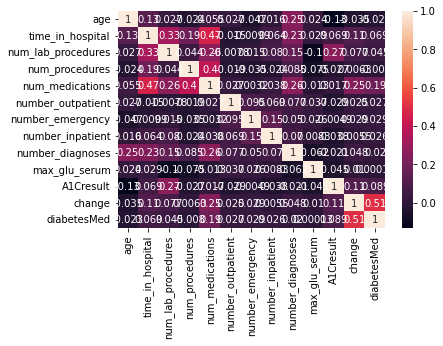

In [75]:
# corr matrix
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [76]:
# List categorical and numeric features
categorical_feat = []
numerical_feat = []

for col in data.columns:
    if data[col].dtype == 'object':
        categorical_feat.append(col)
    elif 'id' in col:
        categorical_feat.append(col)
    elif data[col].dtype == 'int64':
        numerical_feat.append(col)

In [77]:
data.describe()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed
count,70431.000000,70431.000000,70431.000000,70431.000000,70431.000000,70431.000000,70431.000000,70431.000000,70431.000000,70431.000000,70431.000000,70431.000000,70431.000000
mean,65.516676,4.283682,42.917011,1.422058,15.666723,0.280104,0.103861,0.176868,7.231248,8.199514,1.261959,-0.100907,0.522227
std,15.977185,2.939699,19.902483,1.754894,8.282795,1.064724,0.511174,0.603268,1.999285,40.452990,2.723536,0.994903,0.852812
min,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000
25%,55.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,-1.000000,1.000000
50%,65.000000,3.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,-1.000000,1.000000
75%,75.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000,1.000000
max,95.000000,14.000000,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,16.000000,300.000000,8.000000,1.000000,1.000000


In [78]:
# for numeric variables with 0 values
num_col_z = ['num_procedures','number_outpatient','number_emergency','number_inpatient']

for i in num_col_z:
    print(i + ': ' + str(data[data[i]==0].shape))
    n = data[i].replace(0, np.NaN)
    print(n.describe())
    print('\n')

num_procedures: (31075, 46)
count    39356.000000
mean         2.544898
std          1.629044
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_procedures, dtype: float64


number_outpatient: (61243, 46)
count    9188.000000
mean        2.147148
std         2.163680
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        42.000000
Name: number_outpatient, dtype: float64


number_emergency: (65299, 46)
count    5132.000000
mean        1.425370
std         1.304865
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        42.000000
Name: number_emergency, dtype: float64


number_inpatient: (62166, 46)
count    8265.000000
mean        1.507199
std         1.047043
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        12.000000
Name: number_inpatient, dtype: float64




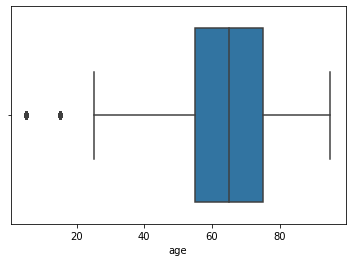

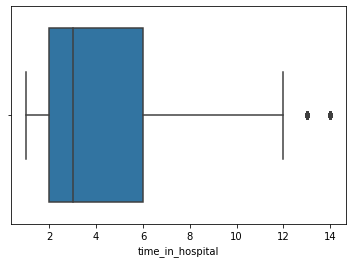

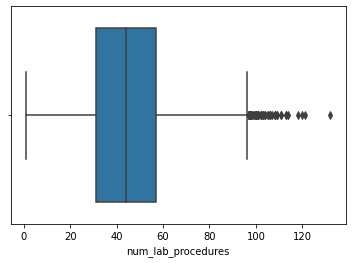

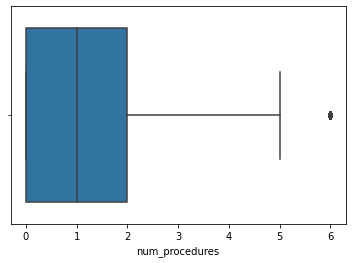

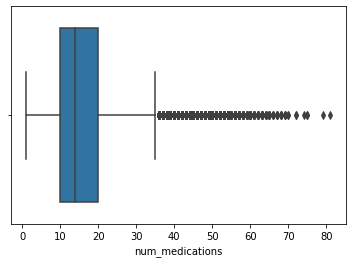

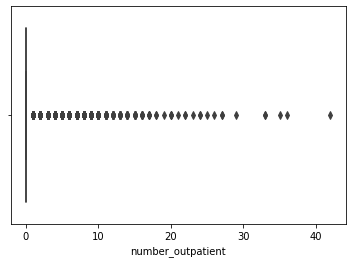

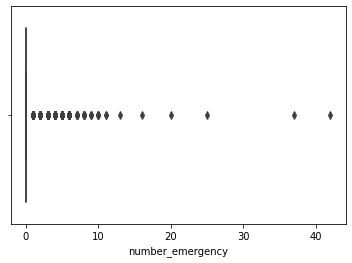

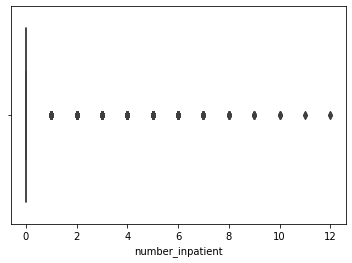

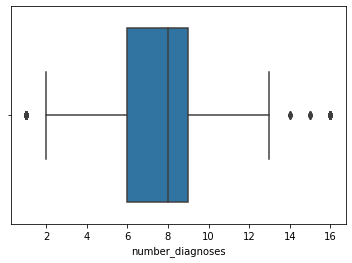

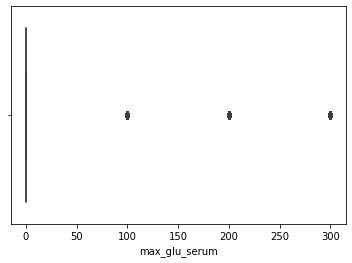

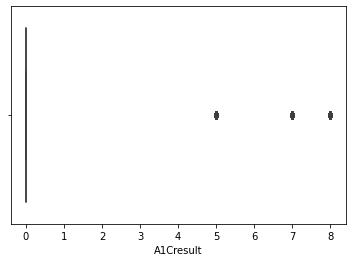

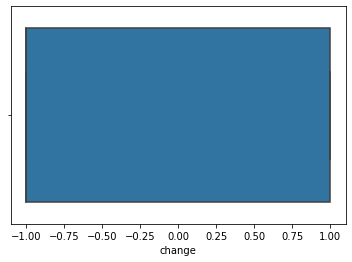

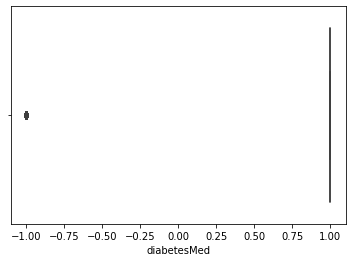

In [79]:
# Boxplot - numeric features
for i in numerical_feat:
    plt.figure(i)
    sns.boxplot(x=data[i])

In [80]:
# Patient count by age and gender
age_gender = data.groupby(['age','gender']).count()
age_gender.iloc[:,0]
# most no. of patients are females aged 70-79 y/o >> males of same age group

age  gender
5    Female      80
     Male        73
15   Female     301
     Male       233
25   Female     728
     Male       394
35   Female    1559
     Male      1133
45   Female    3353
     Male      3487
55   Female    6005
     Male      6363
65   Female    7686
     Male      8076
75   Female    9593
     Male      8294
85   Female    6889
     Male      4378
95   Female    1274
     Male       532
Name: race, dtype: int64

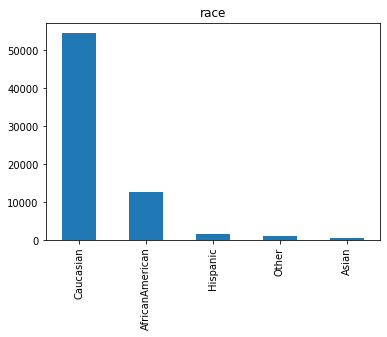

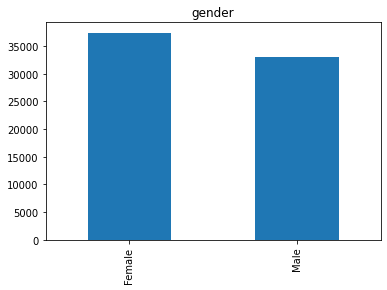

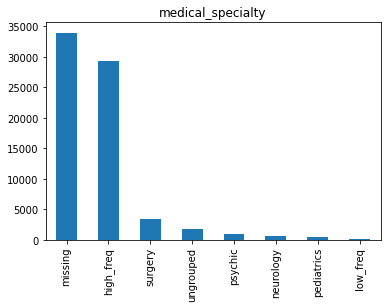

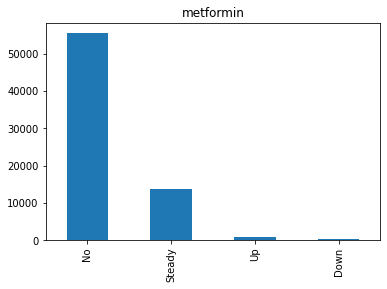

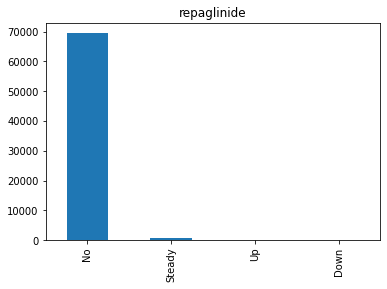

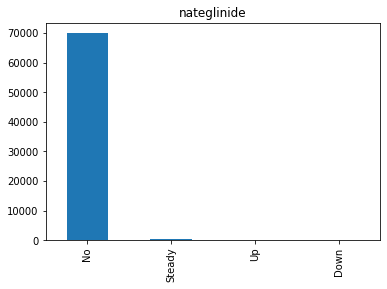

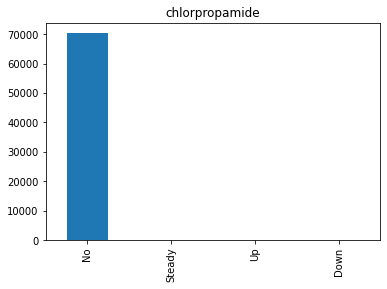

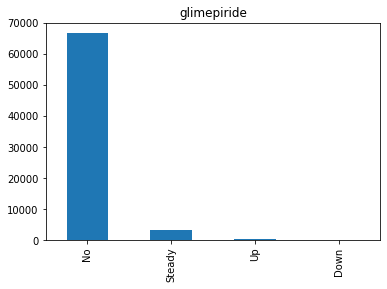

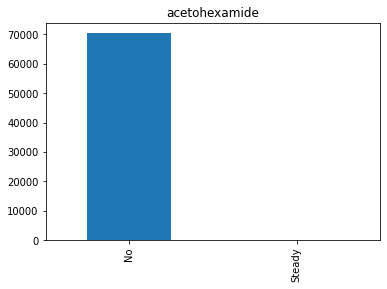

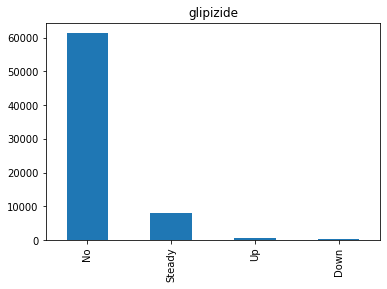

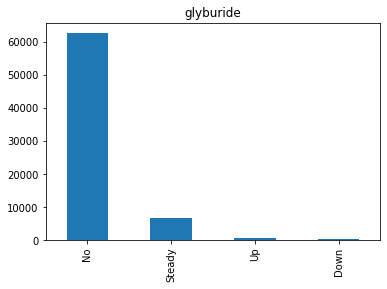

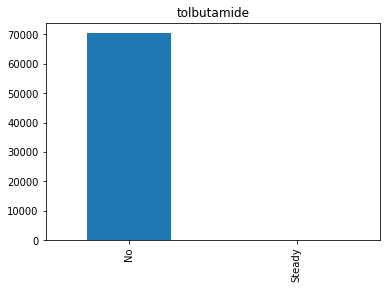

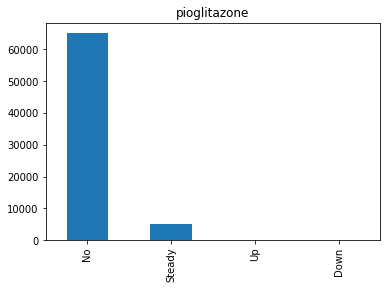

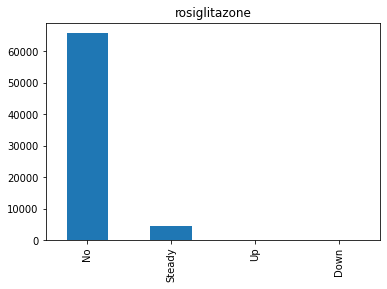

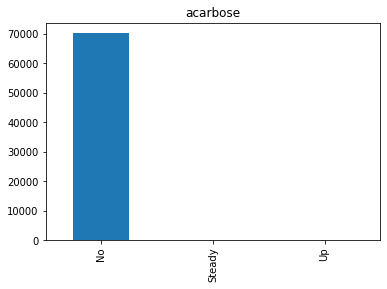

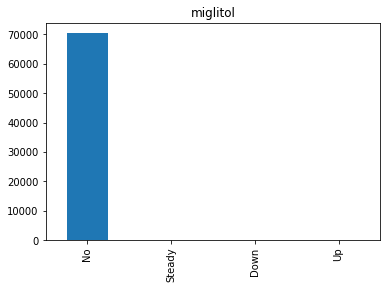

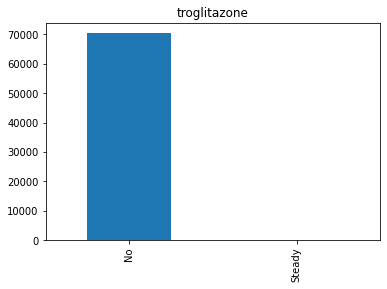

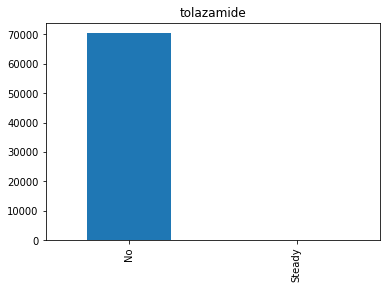

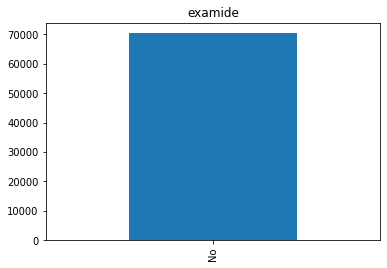

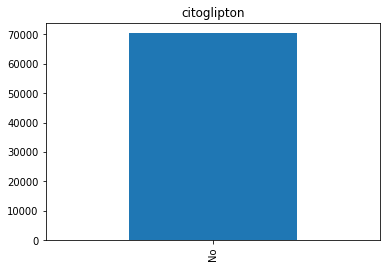

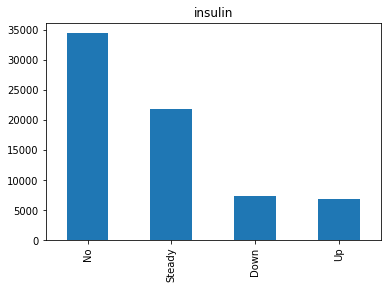

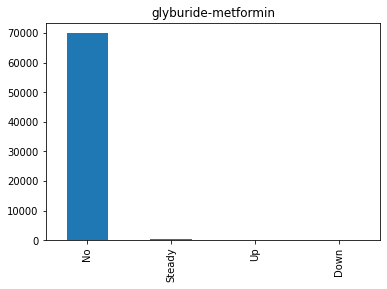

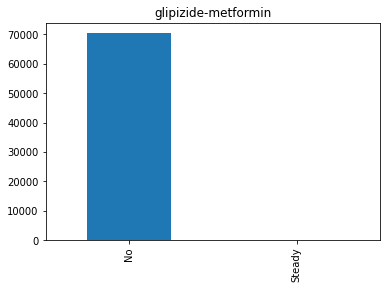

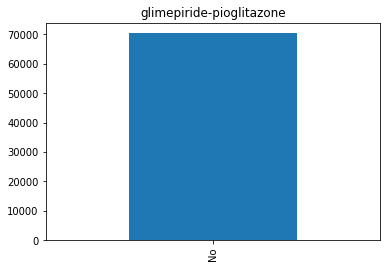

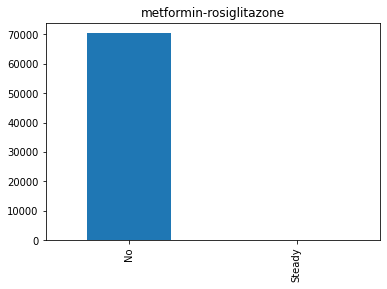

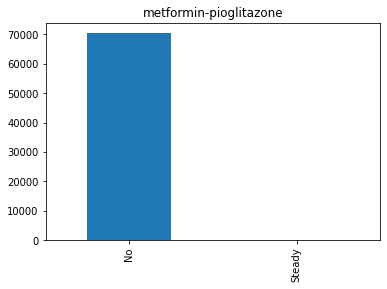

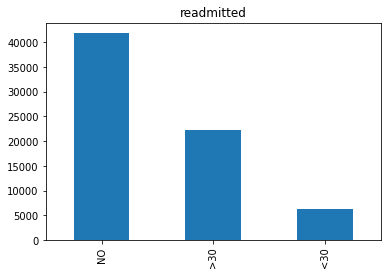

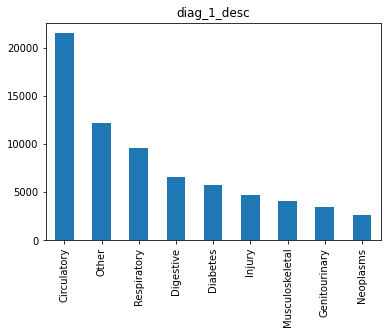

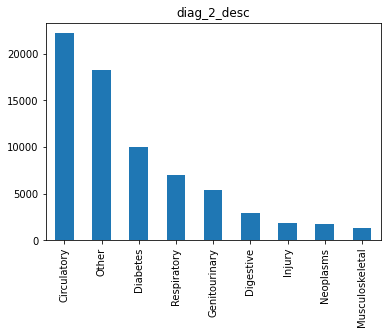

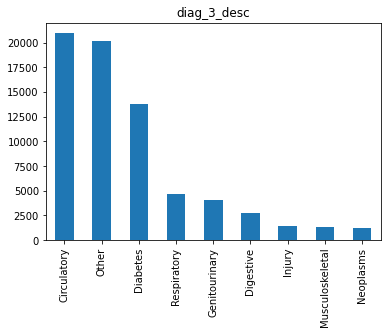

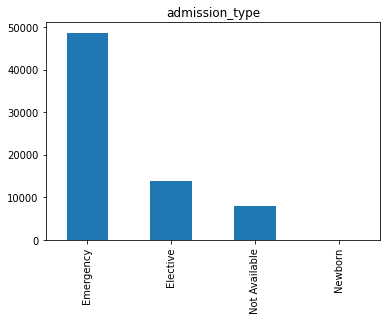

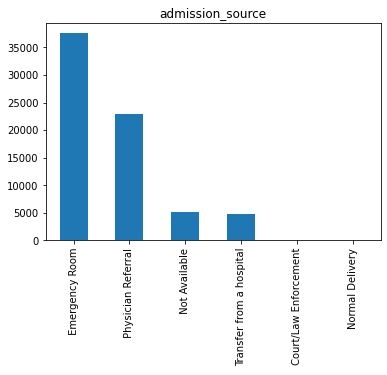

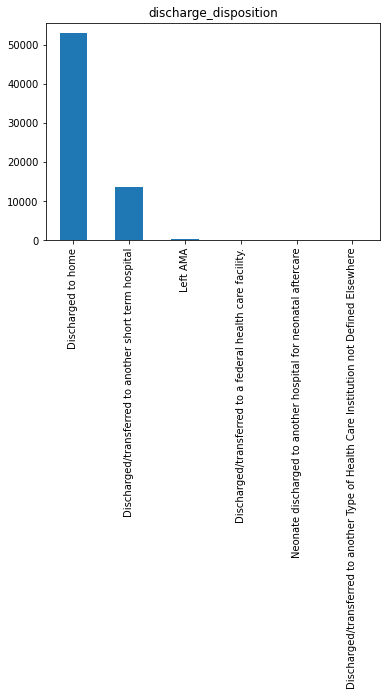

In [81]:
# Bar - categorical
for i in categorical_feat:
    plt.rcParams.update({'figure.max_open_warning': 0})
    plt.figure(i)
    plt.title(i)
    data[i].value_counts().plot(kind='bar')

# A1C: 83% not tested
# Glucose serum: 95% not testes
# big % not tested but almost 50% changed meds; what diagnoses?
# big % not tested but 77% are prescribed diabetes medications


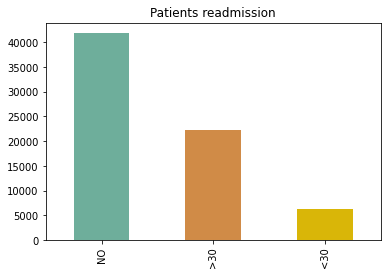

In [82]:
plt.figure()
plt.title('Patients readmission')
data['readmitted'].value_counts().plot(kind='bar',color=['#6EAE9B','#D08B47','#D9B608'])

In [83]:
# % of categ features
for i in categorical_feat:
    a = data.groupby([i]).size().reset_index(name='counts')
    a['pcts'] = round((a['counts']/a['counts'].sum() * 100),2)
    print(a)

              race  counts   pcts
0  AfricanAmerican   12692  18.02
1            Asian     491   0.70
2        Caucasian   54582  77.50
3         Hispanic    1506   2.14
4            Other    1160   1.65
   gender  counts  pcts
0  Female   37468  53.2
1    Male   32963  46.8
  medical_specialty  counts   pcts
0         high_freq   29264  41.55
1          low_freq     101   0.14
2           missing   33935  48.18
3         neurology     573   0.81
4        pediatrics     460   0.65
5           psychic     904   1.28
6           surgery    3408   4.84
7         ungrouped    1786   2.54
  metformin  counts   pcts
0      Down     435   0.62
1        No   55497  78.80
2    Steady   13661  19.40
3        Up     838   1.19
  repaglinide  counts   pcts
0        Down      29   0.04
1          No   69509  98.69
2      Steady     820   1.16
3          Up      73   0.10
  nateglinide  counts   pcts
0        Down       8   0.01
1          No   69938  99.30
2      Steady     469   0.67
3          Up

In [84]:
# Get counts for each readmitted, diagnosis 1 desc
data_diag_cnt = data.groupby(['readmitted', 'diag_1_desc']).size().reset_index(name='counts')
data_diag_cnt = data_diag_cnt[data_diag_cnt['readmitted']=='<30']
data_diag_cnt1 = data_diag_cnt['counts'].tolist()

data_diag_cnt = data.groupby(['readmitted', 'diag_1_desc']).size().reset_index(name='counts')
data_diag_cnt = data_diag_cnt[data_diag_cnt['readmitted']=='>30']
data_diag_cnt2 = data_diag_cnt['counts'].tolist()

data_diag_cnt = data.groupby(['readmitted', 'diag_1_desc']).size().reset_index(name='counts')
data_diag_cnt = data_diag_cnt[data_diag_cnt['readmitted']=='NO']
data_diag_cnt3 = data_diag_cnt['counts'].tolist()
#df_diag_cnt

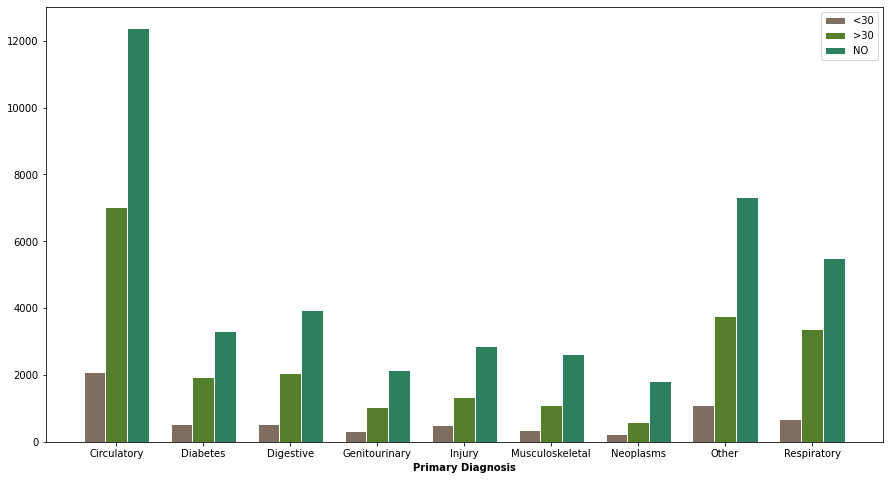

In [85]:
# Plot Readmission vs Primary Diagnosis
data1 = data[['diag_1_desc','readmitted']]
data1

fig,ax = plt.subplots()
fig.set_size_inches(15, 8)

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = data_diag_cnt1
bars2 = data_diag_cnt2
bars3 = data_diag_cnt3
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='<30')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='>30')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='NO')
 
# Add xticks on the middle of the group bars
plt.xlabel('Primary Diagnosis', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury',
                                                      'Musculoskeletal','Neoplasms','Other','Respiratory'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [86]:
# Number of patients per readmitted ind and primary diagnosis
data_diag_cnt = data.groupby(['readmitted', 'diag_1_desc']).size().reset_index(name='counts')
data_diag_cnt

,readmitted,diag_1_desc,counts
0,<30,Circulatory,2079
1,<30,Diabetes,525
2,<30,Digestive,522
3,<30,Genitourinary,311
4,<30,Injury,506
5,<30,Musculoskeletal,341
6,<30,Neoplasms,231
7,<30,Other,1087
8,<30,Respiratory,691
9,>30,Circulatory,7039


In [87]:
# A1C Results vs Readmitted
data.groupby(['A1Cresult','readmitted']).size().reset_index(name='counts')

,A1Cresult,readmitted,counts
0,0,<30,5213
1,0,>30,18377
2,0,NO,33963
3,5,<30,324
4,5,>30,1041
5,5,NO,2392
6,7,<30,246
7,7,>30,862
8,7,NO,1764
9,8,<30,510


In [88]:
total_a1c_res = data.groupby(['A1Cresult']).size().reset_index(name='counts')
a1c_res_readm_cnt = data.groupby(['readmitted', 'A1Cresult']).size().reset_index(name='counts')

read_a1c = a1c_res_readm_cnt.groupby(['readmitted', 'A1Cresult']).agg({'counts': 'sum'})
read = a1c_res_readm_cnt.groupby(['A1Cresult']).agg({'counts': 'sum'})
a1c_pcts = read_a1c.div(read) * 100
a1c_pcts.rename(columns = {'counts':'pcts'})

pcts
readmitted A1Cresult           
<30        0           9.057738
           5           8.623902
           7           8.565460
           8           8.161306
>30        0          31.930568
           5          27.708278
           7          30.013928
           8          31.365018
NO         0          59.011694
           5          63.667820
           7          61.420613
           8          60.473676

In [89]:
# means
data.groupby(['readmitted']).mean()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed
readmitted,,,,,,,,,,,,,
<30,67.849198,4.797394,44.930240,1.422692,16.620213,0.309868,0.149849,0.370729,7.513745,9.391387,1.179406,-0.053234,0.598602
>30,66.639838,4.419604,43.992986,1.355126,15.892941,0.379406,0.151799,0.257734,7.485791,9.244604,1.210387,-0.057374,0.582374
NO,64.570147,4.134374,42.043487,1.457492,15.403432,0.222922,0.071507,0.104826,7.053702,7.465750,1.301733,-0.131176,0.478830


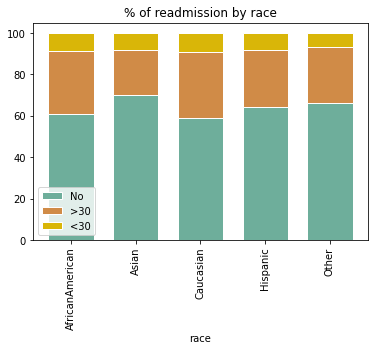

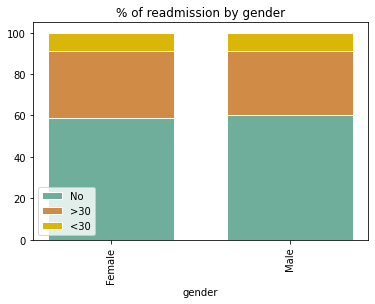

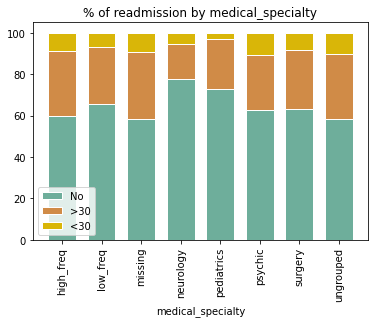

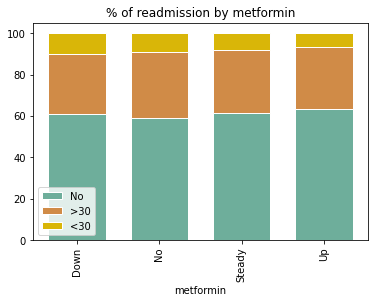

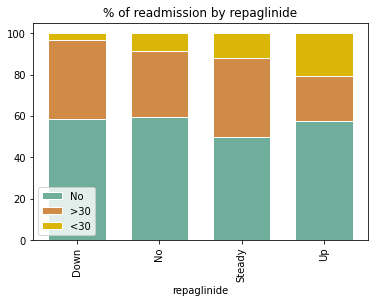

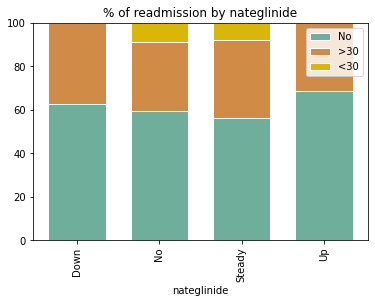

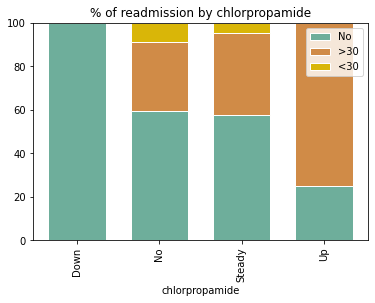

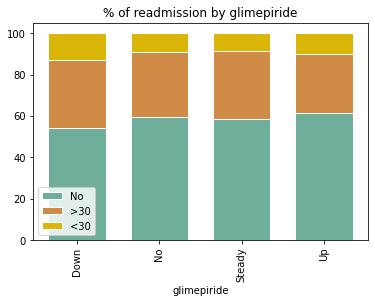

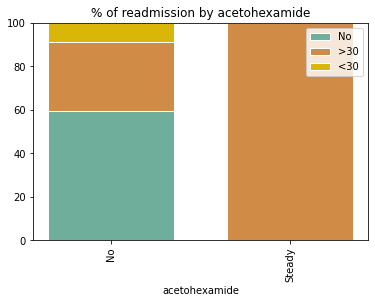

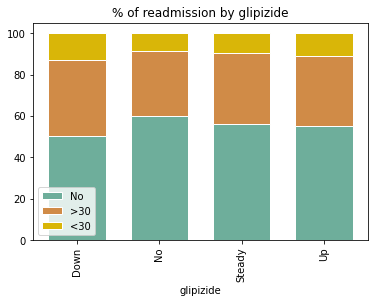

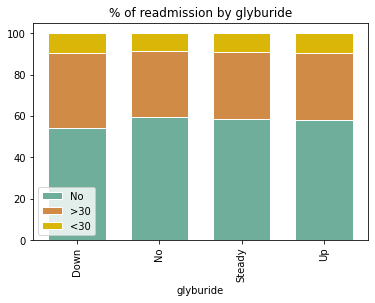

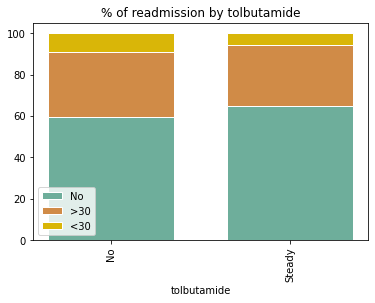

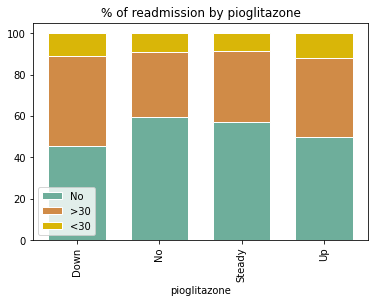

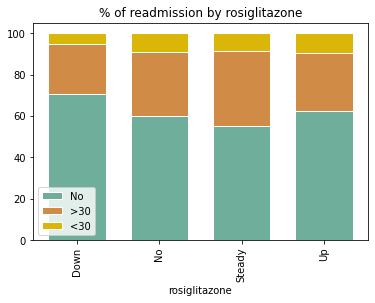

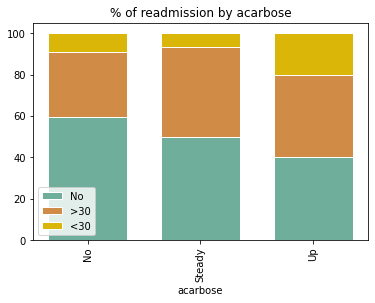

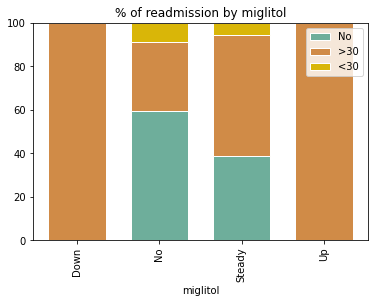

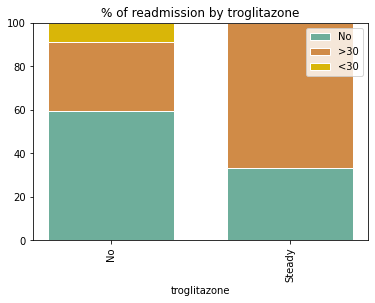

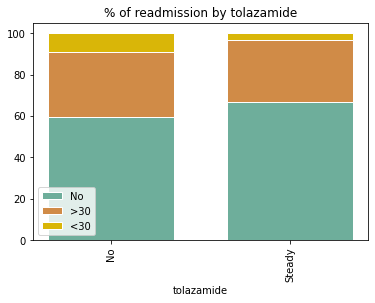

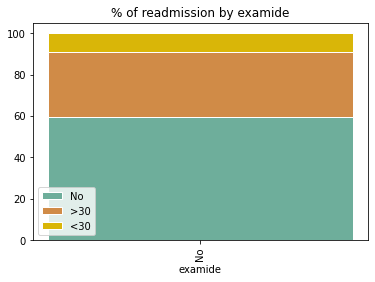

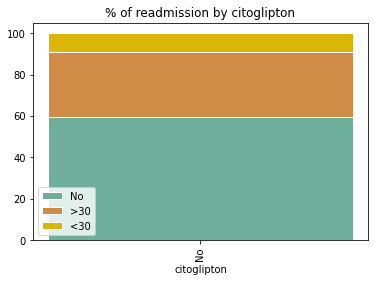

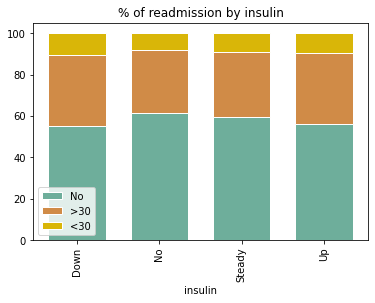

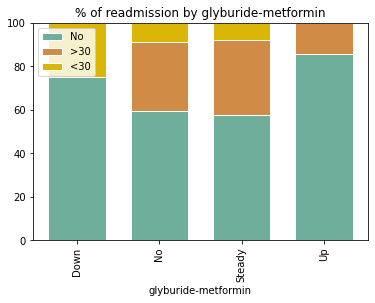

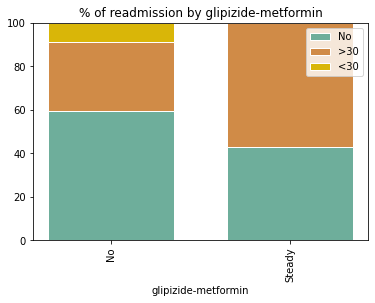

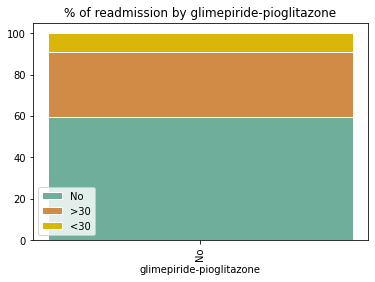

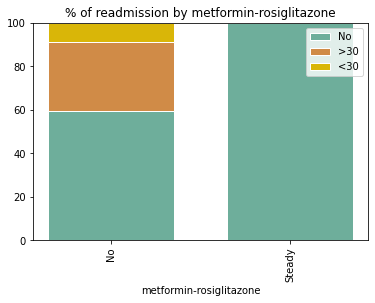

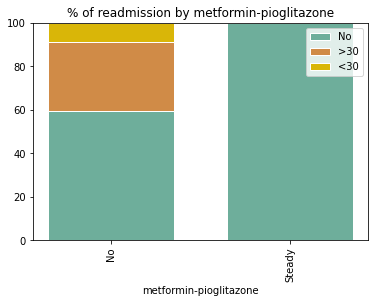

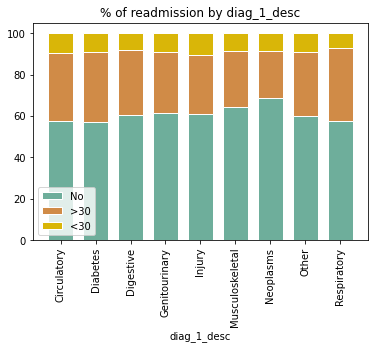

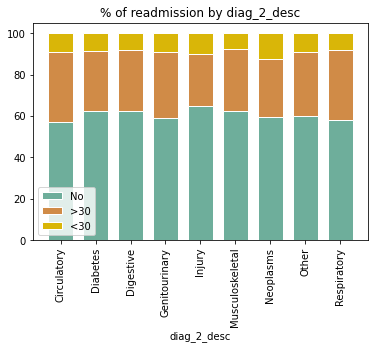

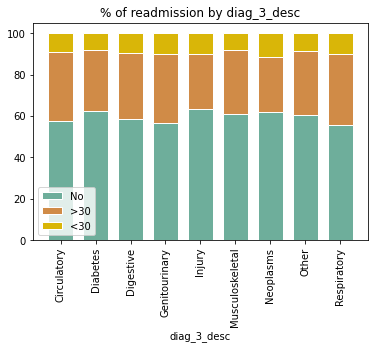

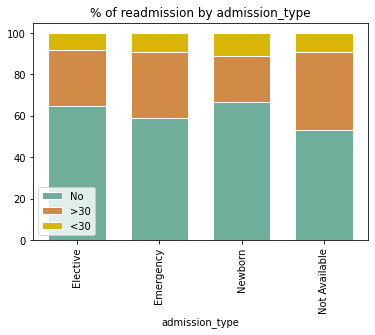

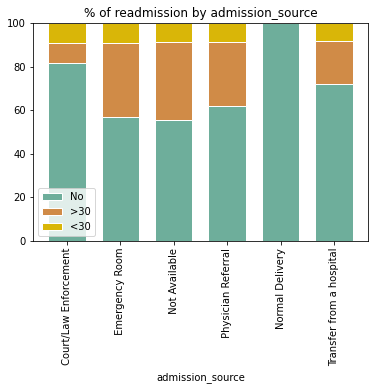

ValueError: ignored

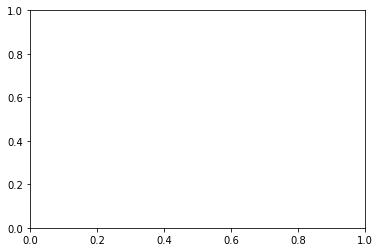

In [91]:
# Loop bar plots to show relationship of readmitted to other categorical variables
for i in categorical_feat:
    if i != 'readmitted':
        readm_cnt = ('readm_cnt_'+ i)
        read = ('read_' + i)
        pcts = ('pcts_' + i)
        unique_val_cnt = len(data[i].unique())  
        
        # Get counts of each value in i grouped by readmitted; show 0 values
        readm_cnt = data.groupby(['readmitted', i]).readmitted.count()
        levels = [readm_cnt.index.levels[0].values, readm_cnt.index.levels[1].values]
        new_index = pd.MultiIndex.from_product(levels, names=readm_cnt.index.names)
        readm_cnt = readm_cnt.reindex(new_index, fill_value=0)
        readm_cnt = readm_cnt.reset_index(name='counts')
        
        # Get percentages
        read = readm_cnt.groupby(['readmitted', i]).agg({'counts': 'sum'})
        read1 = readm_cnt.groupby([i]).agg({'counts': 'sum'})
        pcts = read.div(read1) * 100
        pcts = pcts.rename(columns = {'counts':'pcts'})
        pcts = pcts.reset_index()

        # Plot
        fig,ax = plt.subplots()

        # Values of each group
        bars1 = pcts.loc[pcts.readmitted=='NO','pcts'].tolist()
        bars2 = pcts.loc[pcts.readmitted=='>30','pcts'].tolist()
        bars3 = pcts.loc[pcts.readmitted=='<30','pcts'].tolist()

        bars = np.add(bars1, bars2).tolist()
        r = list(range(len(data[i].unique())))

        names = pcts[i]
        barWidth = 0.7

        plt.bar(r, bars1, color='#6EAE9B', edgecolor='white', width=barWidth)
        plt.bar(r, bars2, bottom=bars1, color='#D08B47', edgecolor='white', width=barWidth)
        plt.bar(r, bars3, bottom=bars, color='#D9B608', edgecolor='white', width=barWidth)

        plt.xticks(r, names, rotation='vertical')
        plt.xlabel(i)

        plt.title('% of readmission by ' + i)
        plt.legend(['No','>30','<30'])
        plt.show()

In [92]:
# Show percentages for each categorical features grouped by readmitted
for i in categorical_feat:
    if i != 'readmitted':
        readm_cnt = ('readm_cnt_'+ i)
        read = ('read_' + i)
        pcts = ('pcts_' + i)
        unique_val_cnt = len(data[i].unique())
        readm_cnt = data.groupby(['readmitted', i]).size().reset_index(name='counts')
        read = readm_cnt.groupby(['readmitted', i]).agg({'counts': 'sum'})
        read1 = readm_cnt.groupby([i]).agg({'counts': 'sum'})
        pcts = read.div(read1) * 100
        pcts = pcts.rename(columns = {'counts':'pcts'})
        print(pcts)

                                 pcts
readmitted race                      
<30        AfricanAmerican   8.611724
           Asian             8.350305
           Caucasian         9.081749
           Hispanic          8.100930
           Other             6.896552
>30        AfricanAmerican  30.491648
           Asian            21.792261
           Caucasian        32.133304
           Hispanic         27.423639
           Other            26.810345
NO         AfricanAmerican  60.896628
           Asian            69.857434
           Caucasian        58.784947
           Hispanic         64.475432
           Other            66.293103
                        pcts
readmitted gender           
<30        Female   8.994342
           Male     8.867518
>30        Female  32.278211
           Male    30.779965
NO         Female  58.727447
           Male    60.352516
                                   pcts
readmitted medical_specialty           
<30        high_freq           8.765036
  

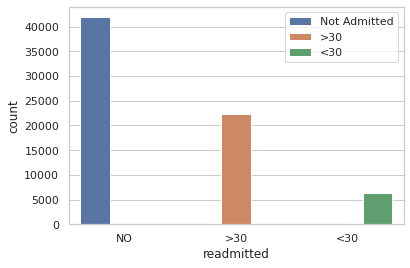

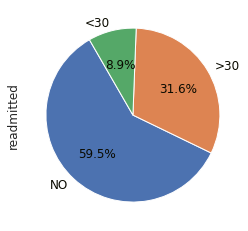

In [93]:
##  
plt.figure()
sns.set_theme(style="whitegrid")
ax = sns.countplot(x = 'readmitted', data = data, hue = 'readmitted')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels = ['Not Admitted', '>30', '<30'])
plt.figure()
data.readmitted.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})

**Data Preparation**

One-hot encode categorical features
Scale numeric features
Join categorical, numeric, and target
Split into train and test sets

In [94]:
# Reset index
data.reset_index(inplace=True)
data.drop(columns='index')

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_desc,diag_2_desc,diag_3_desc,admission_type,admission_source,discharge_disposition
0,Caucasian,Female,5,1,pediatrics,41,0,1,0,0,...,No,-1,-1,NO,Diabetes,Diabetes,Diabetes,Not Available,Physician Referral,NaN
1,Caucasian,Female,15,3,missing,59,0,18,0,0,...,No,1,1,>30,Other,Diabetes,Other,Emergency,Emergency Room,Discharged to home
2,AfricanAmerican,Female,25,2,missing,11,5,13,2,0,...,No,-1,1,NO,Other,Diabetes,Other,Emergency,Emergency Room,Discharged to home
3,Caucasian,Male,35,2,missing,44,1,16,0,0,...,No,1,1,NO,Other,Diabetes,Circulatory,Emergency,Emergency Room,Discharged to home
4,Caucasian,Male,45,1,missing,51,0,8,0,0,...,No,1,1,NO,Neoplasms,Neoplasms,Diabetes,Emergency,Emergency Room,Discharged to home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70426,Caucasian,Female,75,9,missing,50,2,33,0,0,...,No,1,1,>30,Digestive,Digestive,Diabetes,Emergency,Emergency Room,Discharged to home
70427,Other,Female,45,14,missing,73,6,26,0,1,...,No,1,1,>30,Genitourinary,Genitourinary,Respiratory,Emergency,Emergency Room,Discharged to home
70428,Other,Female,65,2,missing,46,6,17,1,1,...,No,-1,1,>30,Injury,Genitourinary,Circulatory,Emergency,Emergency Room,Discharged to home
70429,Caucasian,Female,85,5,missing,76,1,22,0,1,...,No,1,1,NO,Other,Other,Other,Emergency,Emergency Room,Discharged to home


**1. One-hot encode categorical features**

In [96]:
df_categ = data[categorical_feat]
df_categ = df_categ.drop(columns='readmitted')
df_categ.head()

,race,gender,medical_specialty,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diag_1_desc,diag_2_desc,diag_3_desc,admission_type,admission_source,discharge_disposition
0,Caucasian,Female,pediatrics,No,No,No,No,No,No,No,...,No,No,No,No,Diabetes,Diabetes,Diabetes,Not Available,Physician Referral,NaN
1,Caucasian,Female,missing,No,No,No,No,No,No,No,...,No,No,No,No,Other,Diabetes,Other,Emergency,Emergency Room,Discharged to home
2,AfricanAmerican,Female,missing,No,No,No,No,No,No,Steady,...,No,No,No,No,Other,Diabetes,Other,Emergency,Emergency Room,Discharged to home
3,Caucasian,Male,missing,No,No,No,No,No,No,No,...,No,No,No,No,Other,Diabetes,Circulatory,Emergency,Emergency Room,Discharged to home
4,Caucasian,Male,missing,No,No,No,No,No,No,Steady,...,No,No,No,No,Neoplasms,Neoplasms,Diabetes,Emergency,Emergency Room,Discharged to home


In [97]:
df_categ.shape

(70431, 32)

In [98]:
categorical_feat.remove('readmitted')
# One-hot encoding
one_hot_df = pd.get_dummies(df_categ, prefix=categorical_feat)
one_hot_df

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,medical_specialty_high_freq,medical_specialty_low_freq,medical_specialty_missing,...,admission_source_ Not Available,admission_source_ Physician Referral,admission_source_Normal Delivery,admission_source_Transfer from a hospital,discharge_disposition_Discharged to home,discharge_disposition_Discharged/transferred to a federal health care facility.,discharge_disposition_Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere,discharge_disposition_Discharged/transferred to another short term hospital,discharge_disposition_Left AMA,discharge_disposition_Neonate discharged to another hospital for neonatal aftercare
0,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70426,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
70427,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
70428,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
70429,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


**2. Scale numeric features**

In [99]:
df_numer = data[numerical_feat]
df_numer.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed
0,5,1,41,0,1,0,0,0,1,0,0,-1,-1
1,15,3,59,0,18,0,0,0,9,0,0,1,1
2,25,2,11,5,13,2,0,1,6,0,0,-1,1
3,35,2,44,1,16,0,0,0,7,0,0,1,1
4,45,1,51,0,8,0,0,0,5,0,0,1,1


In [100]:
from sklearn.preprocessing import RobustScaler

#Scale numerical features
df_numer_scaled = pd.DataFrame(RobustScaler().fit_transform(df_numer[numerical_feat]), columns=numerical_feat)
df_numer_scaled

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed
0,-3.0,-0.50,-0.115385,-0.5,-1.3,0.0,0.0,0.0,-2.333333,0.0,0.0,0.0,-2.0
1,-2.5,0.00,0.576923,-0.5,0.4,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,0.0
2,-2.0,-0.25,-1.269231,2.0,-0.1,2.0,0.0,1.0,-0.666667,0.0,0.0,0.0,0.0
3,-1.5,-0.25,0.000000,0.0,0.2,0.0,0.0,0.0,-0.333333,0.0,0.0,1.0,0.0
4,-1.0,-0.50,0.269231,-0.5,-0.6,0.0,0.0,0.0,-1.000000,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70426,0.5,1.50,0.230769,0.5,1.9,0.0,0.0,0.0,0.333333,0.0,7.0,1.0,0.0
70427,-1.0,2.75,1.115385,2.5,1.2,0.0,1.0,0.0,0.333333,0.0,8.0,1.0,0.0
70428,0.0,-0.25,0.076923,2.5,0.3,1.0,1.0,1.0,0.333333,0.0,0.0,0.0,0.0
70429,1.0,0.50,1.230769,0.0,0.8,0.0,1.0,0.0,0.333333,0.0,0.0,1.0,0.0


**3. Join categorical, numeric, and target**

In [103]:
# Join one hot encoded features & numerical features
fin_df = one_hot_df.join(df_numer_scaled)
fin_df

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,medical_specialty_high_freq,medical_specialty_low_freq,medical_specialty_missing,...,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed
0,0,0,1,0,0,1,0,0,0,0,...,-0.5,-1.3,0.0,0.0,0.0,-2.333333,0.0,0.0,0.0,-2.0
1,0,0,1,0,0,1,0,0,0,1,...,-0.5,0.4,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,0.0
2,1,0,0,0,0,1,0,0,0,1,...,2.0,-0.1,2.0,0.0,1.0,-0.666667,0.0,0.0,0.0,0.0
3,0,0,1,0,0,0,1,0,0,1,...,0.0,0.2,0.0,0.0,0.0,-0.333333,0.0,0.0,1.0,0.0
4,0,0,1,0,0,0,1,0,0,1,...,-0.5,-0.6,0.0,0.0,0.0,-1.000000,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70426,0,0,1,0,0,1,0,0,0,1,...,0.5,1.9,0.0,0.0,0.0,0.333333,0.0,7.0,1.0,0.0
70427,0,0,0,0,1,1,0,0,0,1,...,2.5,1.2,0.0,1.0,0.0,0.333333,0.0,8.0,1.0,0.0
70428,0,0,0,0,1,1,0,0,0,1,...,2.5,0.3,1.0,1.0,1.0,0.333333,0.0,0.0,0.0,0.0
70429,0,0,1,0,0,1,0,0,0,1,...,0.0,0.8,0.0,1.0,0.0,0.333333,0.0,0.0,1.0,0.0


In [104]:
# Join target variable - readmitted
target = pd.DataFrame(data['readmitted'])
fin_df = fin_df.join(target)
fin_df

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,medical_specialty_high_freq,medical_specialty_low_freq,medical_specialty_missing,...,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
0,0,0,1,0,0,1,0,0,0,0,...,-1.3,0.0,0.0,0.0,-2.333333,0.0,0.0,0.0,-2.0,NO
1,0,0,1,0,0,1,0,0,0,1,...,0.4,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,>30
2,1,0,0,0,0,1,0,0,0,1,...,-0.1,2.0,0.0,1.0,-0.666667,0.0,0.0,0.0,0.0,NO
3,0,0,1,0,0,0,1,0,0,1,...,0.2,0.0,0.0,0.0,-0.333333,0.0,0.0,1.0,0.0,NO
4,0,0,1,0,0,0,1,0,0,1,...,-0.6,0.0,0.0,0.0,-1.000000,0.0,0.0,1.0,0.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70426,0,0,1,0,0,1,0,0,0,1,...,1.9,0.0,0.0,0.0,0.333333,0.0,7.0,1.0,0.0,>30
70427,0,0,0,0,1,1,0,0,0,1,...,1.2,0.0,1.0,0.0,0.333333,0.0,8.0,1.0,0.0,>30
70428,0,0,0,0,1,1,0,0,0,1,...,0.3,1.0,1.0,1.0,0.333333,0.0,0.0,0.0,0.0,>30
70429,0,0,1,0,0,1,0,0,0,1,...,0.8,0.0,1.0,0.0,0.333333,0.0,0.0,1.0,0.0,NO


In [105]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70431 entries, 0 to 70430
Columns: 140 entries, race_AfricanAmerican to readmitted
dtypes: float64(13), object(1), uint8(126)
memory usage: 16.0+ MB


In [106]:
fin_df['readmitted']

0         NO
1        >30
2         NO
3         NO
4         NO
        ... 
70426    >30
70427    >30
70428    >30
70429     NO
70430     NO
Name: readmitted, Length: 70431, dtype: object

**4. Split into train and test sets**

In [107]:
from sklearn.model_selection import train_test_split

X = fin_df.drop(columns='readmitted')
y = fin_df['readmitted']

#Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [108]:
y

0         NO
1        >30
2         NO
3         NO
4         NO
        ... 
70426    >30
70427    >30
70428    >30
70429     NO
70430     NO
Name: readmitted, Length: 70431, dtype: object

In [110]:
X_train

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,medical_specialty_high_freq,medical_specialty_low_freq,medical_specialty_missing,...,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed
14581,0,0,1,0,0,0,1,0,0,0,...,2.5,2.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
49361,1,0,0,0,0,0,1,0,0,1,...,-0.5,-0.8,0.0,0.0,0.0,-0.666667,0.0,0.0,1.0,0.0
9462,0,0,1,0,0,1,0,0,0,1,...,1.0,0.6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-2.0
7271,0,0,1,0,0,1,0,0,0,1,...,0.0,-0.7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
31637,0,0,1,0,0,0,1,1,0,0,...,0.5,0.2,0.0,0.0,2.0,0.333333,0.0,0.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14819,0,0,1,0,0,1,0,0,0,0,...,-0.5,-0.8,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,-2.0
51963,0,0,1,0,0,1,0,0,0,1,...,1.0,0.2,1.0,0.0,0.0,-1.333333,0.0,0.0,0.0,0.0
27114,1,0,0,0,0,1,0,1,0,0,...,-0.5,-1.2,0.0,0.0,0.0,-1.000000,0.0,0.0,0.0,0.0
9725,1,0,0,0,0,1,0,0,0,1,...,2.0,0.6,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0


In [109]:
y_train

14581     NO
49361     NO
9462     >30
7271      NO
31637    >30
        ... 
14819     NO
51963    >30
27114     NO
9725      NO
65833     NO
Name: readmitted, Length: 56344, dtype: object

In [111]:
y_train.value_counts()

NO     33425
>30    17806
<30     5113
Name: readmitted, dtype: int64

In [112]:
fin_df['readmitted'].value_counts()

NO     41898
>30    22240
<30     6293
Name: readmitted, dtype: int64

# **Modeling & Evaluation**

Test on different groupings of target variable:
* Predicting 3 classes (<30, >30, No)
* Predicting readmission (0: No, 1: <30 + >30)
* Predicting early readmission (0: >30 + No, 1: <30)


For each grouping:
Resample training set
Fit classification models on training set & evaluate on test set
Get important features

In [113]:
# Resampling
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# **Predicting 3 classes: (<30, >30, No) Resample training set**



In [114]:
#Resample & fit model on training set

#Specify how many samples we want for <30 class and >30 class after resampling
over_strategy = {'>30':21000, '<30':10000}
under_strategy = {'NO': 28000}

#Oversample minority classes (<30, >30)
oversample = SMOTENC(categorical_features=range(0,138), sampling_strategy=over_strategy)

#Undersample majority class (No)
undersample = RandomUnderSampler(sampling_strategy=under_strategy)

steps = [('o', oversample), ('u', undersample)]
resampling = Pipeline(steps=steps)

X_train_res, y_train_res = resampling.fit_resample(X_train, y_train)

In [115]:
y_train_res.value_counts()

NO     28000
>30    21000
<30    10000
Name: readmitted, dtype: int64

**Fit classification models on training set & evaluate on test set**

Logistic regression

In [116]:
X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)
X_train_res

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,medical_specialty_high_freq,medical_specialty_low_freq,medical_specialty_missing,...,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed
0,1,0,0,0,0,0,1,0,0,1,...,-0.5,-0.3,0.0,1.0,0.0,-0.333333,300.0,0.0,1.0,0.0
1,0,0,1,0,0,1,0,0,0,1,...,1.0,-0.3,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
2,0,0,1,0,0,0,1,0,0,1,...,-0.5,-0.5,0.0,0.0,0.0,-0.333333,0.0,0.0,1.0,0.0
3,0,0,1,0,0,1,0,0,0,1,...,-0.5,-0.5,0.0,0.0,0.0,-0.666667,0.0,0.0,0.0,-2.0
4,0,0,1,0,0,0,1,0,0,1,...,0.0,-0.6,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58995,1,0,0,0,0,1,0,0,0,1,...,2.5,0.2,1.0,0.0,1.0,0.333333,0.0,0.0,0.0,0.0
58996,0,0,1,0,0,0,1,0,0,0,...,0.0,-0.4,0.0,0.0,0.0,-1.666667,0.0,8.0,1.0,0.0
58997,0,0,1,0,0,0,1,1,0,0,...,0.5,-0.4,0.0,0.0,0.0,-0.333333,0.0,5.0,0.0,0.0
58998,0,0,1,0,0,0,1,0,0,0,...,0.5,0.4,0.0,0.0,0.0,0.333333,100.0,0.0,0.0,-2.0


In [122]:
from sklearn.linear_model import SGDClassifier
for C in np.linspace(0.0001, 0.03, 30) :
    lr_model = SGDClassifier(alpha = C, learning_rate = 'adaptive', loss = 'log' , penalty = 'elasticnet', \
                             random_state = 24, class_weight = 'balanced', eta0 = 0.001,
                             early_stopping = True, n_iter_no_change = 3)
    lr_model.fit(X_train_res, y_train_res)
    print(C, roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))

    roc = {label: [] for label in multi_class_series.unique()}
for label in multi_class_series.unique():
    selected_classifier.fit(train_set_dataframe, train_class == label)
    predictions_proba = selected_classifier.predict_proba(test_set_dataframe)
    roc[label] += roc_auc_score(test_class, predictions_proba[:,1])

ValueError: ignored

In [123]:
y_train_res.unique()

array(['<30', '>30', 'NO'], dtype=object)

In [127]:
from sklearn.metrics import roc_curve, auc
#Fit logistic regression model
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_res, y_train_res)

#Get final evaluation metrics on test set for logistic regression
lr_train_score = lr.score(X_train_res, y_train_res)
lr_test_score = lr.score(X_test, y_test)
print("Logistic regression: ")
print("train mean accuracy: %f" %(lr_train_score))
print("test mean accuracy: %f" %(lr_test_score))

#Get confusion matrix and f1-score
y_pred = lr.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(confusion_matrix(y_test, y_pred))
print("f1-score: %f" %(f1))

#Get feature names
features = np.array(X_train_res.columns)
#Sort coefficients in ascending order
sorted_coeff_index = lr.coef_[0].argsort()

#Get features with top 20 smallest and top 20 largest coefficients
print('Least important features (smallest coefs): \n{}\n'.format(features[sorted_coeff_index[:20]]))
print('Most important features (largest coefs): \n{}\n'.format(features[sorted_coeff_index[:-21:-1]]))

Logistic regression: 
train mean accuracy: 0.555627
test mean accuracy: 0.602044
[[  29  314  837]
 [  45 1283 3106]
 [  70 1234 7169]]
f1-score: 0.555178
Least important features (smallest coefs): 
['diag_2_desc_Musculoskeletal' 'diag_1_desc_Genitourinary'
 'diag_1_desc_Respiratory' 'diag_3_desc_Genitourinary'
 'diag_2_desc_Genitourinary' 'diag_3_desc_Musculoskeletal'
 'diag_3_desc_Injury' 'diag_3_desc_Respiratory' 'diag_2_desc_Respiratory'
 'diag_1_desc_Digestive' 'diag_1_desc_Musculoskeletal'
 'diag_1_desc_Injury' 'diag_1_desc_Other' 'diag_3_desc_Other'
 'diag_3_desc_Digestive' 'diag_1_desc_Neoplasms' 'diag_2_desc_Digestive'
 'diag_2_desc_Injury' 'diag_3_desc_Circulatory' 'diag_3_desc_Diabetes']

Most important features (largest coefs): 
['tolbutamide_No' 'troglitazone_No' 'glipizide-metformin_No'
 'discharge_disposition_Discharged/transferred to a federal health care facility.'
 'nateglinide_No' 'tolazamide_No' 'chlorpropamide_No'
 'metformin-rosiglitazone_No'
 'discharge_dispositi

In [129]:
imp = []
for colName, importance in zip(np.array(X_train.columns), lr.coef_[0]) :
    imp.append((colName, importance))

imp = [(key, val) for key, val in sorted(imp, key = lambda x : x[1], reverse = True)]

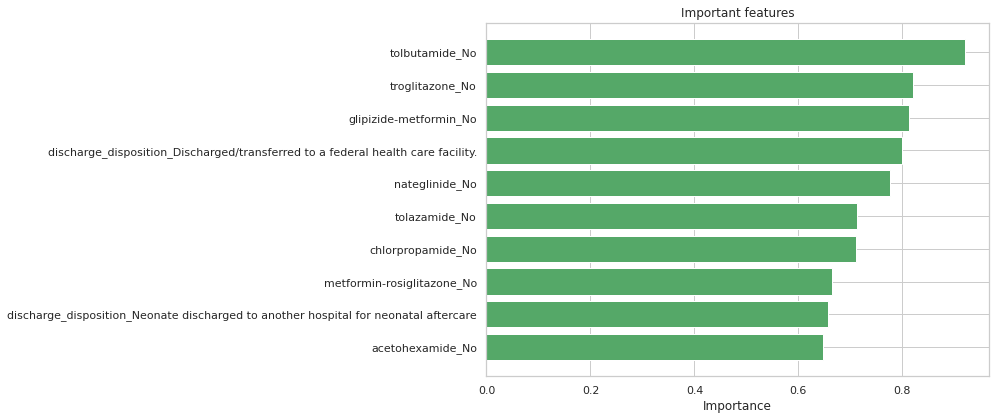

In [130]:
imp1 = imp[0:10]
plt.figure(figsize=(9, 6.5))
plt.barh(range(len(imp1))[::-1], [x[1]  for x in imp1] , align='center', color = 'g')
plt.yticks(range(len(imp1))[::-1], [x[0]  for x in imp1], )
plt.xlabel('Importance')
plt.title('Important features')
plt.show()

**Random Forest**

In [131]:
#Fit random classifier model
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_leaf=5, min_samples_split=5)
rf.fit(X_train_res, y_train_res)


#Get evaluation metrics on test set for random forest
rf_train_score = rf.score(X_train_res, y_train_res)
rf_test_score = rf.score(X_test, y_test)
print("Random forest: ")
print("train mean accuracy: %f" %(rf_train_score))
print("test mean accuracy: %f" %(rf_test_score))

#Get confusion matrix and f1-score
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(confusion_matrix(y_test, y_pred))
print("f1-score: %f" %(f1))

#Get feature names
features = np.array(X_train.columns)
#Sort coefficients in ascending order
sorted_coeff_index = rf.feature_importances_.argsort()

#Get features with top 20 smallest and top 20 largest coefficients
print('Least important features (smallest coefs): \n{}\n'.format(features[sorted_coeff_index[:20]]))
print('Most important features (largest coefs): \n{}\n'.format(features[sorted_coeff_index[:-21:-1]]))

Random forest: 
train mean accuracy: 0.526508
test mean accuracy: 0.609924
[[   0  216  964]
 [   0  861 3573]
 [   0  742 7731]]
f1-score: 0.535069
Least important features (smallest coefs): 
['acarbose_Up' 'metformin-pioglitazone_Steady' 'acetohexamide_Steady'
 'metformin-pioglitazone_No' 'metformin-rosiglitazone_Steady'
 'metformin-rosiglitazone_No' 'glimepiride-pioglitazone_No'
 'tolbutamide_No' 'tolbutamide_Steady' 'glipizide-metformin_Steady'
 'rosiglitazone_Down' 'glipizide-metformin_No'
 'admission_source_ Court/Law Enforcement' 'miglitol_Down' 'miglitol_No'
 'miglitol_Steady' 'miglitol_Up' 'troglitazone_No' 'troglitazone_Steady'
 'tolazamide_No']

Most important features (largest coefs): 
['number_diagnoses' 'number_inpatient' 'age' 'num_medications'
 'discharge_disposition_Discharged/transferred to another short term hospital'
 'num_lab_procedures' 'num_procedures' 'A1Cresult'
 'admission_source_Transfer from a hospital'
 'discharge_disposition_Discharged to home' 'time_in_ho

In [132]:
imp = []
for colName, importance in zip(np.array(X_train.columns), rf.feature_importances_) :
    imp.append((colName, importance))

imp = [(key, val) for key, val in sorted(imp, key = lambda x : x[1], reverse = True)]

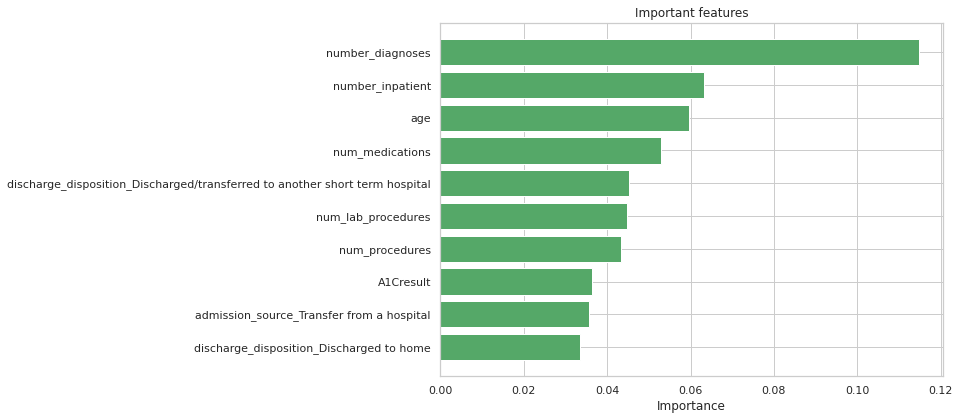

In [133]:
imp1 = imp[0:10]
plt.figure(figsize=(9, 6.5))
plt.barh(range(len(imp1))[::-1], [x[1]  for x in imp1] , align='center', color = 'g')
plt.yticks(range(len(imp1))[::-1], [x[0]  for x in imp1], )
plt.xlabel('Importance')
plt.title('Important features')
plt.show()

# **Predicting readmission, two classes (0: No, 1: <30 + >30)**

In [134]:
fin_df.readmitted = fin_df.readmitted.replace('NO', 0)
fin_df.readmitted = fin_df.readmitted.replace('<30', 1)
fin_df.readmitted = fin_df.readmitted.replace('>30', 2)

In [135]:
fin_df['readmitted'].value_counts()

0    41898
2    22240
1     6293
Name: readmitted, dtype: int64

In [136]:
readmitted_df = fin_df.copy(deep=True)
replace_readmitted = lambda x: 1 if x!=0 else 0

readmitted_df['readmitted_or_not'] = readmitted_df.apply(lambda row: replace_readmitted(row['readmitted']), axis=1)
readmitted_df.drop(columns='readmitted', inplace=True)

readmitted_df['readmitted_or_not'].value_counts()

0    41898
1    28533
Name: readmitted_or_not, dtype: int64

In [137]:
fin_df['readmitted']

0        0
1        2
2        0
3        0
4        0
        ..
70426    2
70427    2
70428    2
70429    0
70430    0
Name: readmitted, Length: 70431, dtype: int64

In [138]:
readmitted_df['readmitted_or_not']

0        0
1        1
2        0
3        0
4        0
        ..
70426    1
70427    1
70428    1
70429    0
70430    0
Name: readmitted_or_not, Length: 70431, dtype: int64

In [139]:
X = readmitted_df.drop(columns='readmitted_or_not')
y = readmitted_df['readmitted_or_not']

#Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [140]:
y_train.value_counts()

0    33509
1    22835
Name: readmitted_or_not, dtype: int64

**Fit classification models on training set & evaluate on test set**

**Logistic regression**

In [141]:
#Fit logistic regression model
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

#Get final evaluation metrics on test set for logistic regression
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
print("Logistic regression: ")
print("train mean accuracy: %f" %(lr_train_score))
print("test mean accuracy: %f" %(lr_test_score))

#Get confusion matrix and f1-score
y_pred = lr.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(confusion_matrix(y_test, y_pred))
print("f1-score: %f" %(f1))

#Get feature names
features = np.array(X_train.columns)
#Sort coefficients in ascending order
sorted_coeff_index = lr.coef_[0].argsort()

#Get features with top 20 smallest and top 20 largest coefficients
print('Least important features (smallest coefs): \n{}\n'.format(features[sorted_coeff_index[:20]]))
print('Most important features (largest coefs): \n{}\n'.format(features[sorted_coeff_index[:-21:-1]]))

Logistic regression: 
train mean accuracy: 0.627396
test mean accuracy: 0.623554
[[7389 1000]
 [4303 1395]]
f1-score: 0.577694
Least important features (smallest coefs): 
['miglitol_No' 'medical_specialty_neurology' 'glyburide-metformin_Up'
 'nateglinide_Up' 'admission_source_ Court/Law Enforcement' 'acarbose_No'
 'rosiglitazone_Down' 'diag_1_desc_Neoplasms' 'tolbutamide_Steady'
 'race_Asian' 'glipizide-metformin_No'
 'admission_source_Transfer from a hospital' 'admission_type_Elective'
 'admission_source_Normal Delivery' 'medical_specialty_low_freq'
 'diag_2_desc_Injury' 'acetohexamide_No' 'pioglitazone_No'
 'diag_3_desc_Neoplasms' 'admission_type_Emergency']

Most important features (largest coefs): 
['discharge_disposition_Neonate discharged to another hospital for neonatal aftercare'
 'discharge_disposition_Discharged/transferred to a federal health care facility.'
 'number_inpatient' 'admission_source_ Emergency Room' 'acarbose_Up'
 'miglitol_Steady' 'admission_source_ Physician R

In [142]:
from sklearn.linear_model import SGDClassifier
for C in np.linspace(0.0001, 0.03, 30) :
    lr_model = SGDClassifier(alpha = C, learning_rate = 'adaptive', loss = 'log' , penalty = 'elasticnet', \
                             random_state = 24, class_weight = 'balanced', eta0 = 0.001,
                             early_stopping = True, n_iter_no_change = 3
                              )
    lr_model.fit(X_train, y_train)
    print(C, roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))

0.0001 0.6360422381998256
0.0011310344827586208 0.6361327811441055
0.0021620689655172413 0.6358434537597727
0.0031931034482758623 0.63538260105193
0.004224137931034483 0.634677765652852
0.005255172413793104 0.6340078566506031
0.006286206896551725 0.6333042032469856
0.007317241379310346 0.6327303183007081
0.008348275862068965 0.6321358687254504
0.009379310344827587 0.6314866917143709
0.010410344827586206 0.6310715602645511
0.011441379310344828 0.6306445147188979
0.01247241379310345 0.6302149901208192
0.013503448275862069 0.6297852877004146
0.01453448275862069 0.6293451042229203
0.01556551724137931 0.6289428282812477
0.01659655172413793 0.6285205734782562
0.017627586206896553 0.6280605575813585
0.018658620689655174 0.6275698098024955
0.019689655172413792 0.6270833925202741
0.020720689655172413 0.6265897577436498
0.021751724137931035 0.6261639151137304
0.022782758620689656 0.6257235956544576
0.023813793103448277 0.6253609217907703
0.0248448275862069 0.6249900053392723
0.025875862068965517

In [143]:
lr_model = SGDClassifier(alpha = 0.02896896551724138, learning_rate = 'adaptive', loss = 'log' , penalty = 'elasticnet', \
                             random_state = 24, class_weight = 'balanced', eta0 = 0.001,
                             early_stopping = True, n_iter_no_change = 3
                              )
lr_model.fit(X_train, y_train)
predicted_prob = lr_model.predict_proba(X_test)[:, 1]
predicted = lr_model.predict(X_test)
AUC_LR = roc_auc_score(y_test, predicted_prob)
print('AUC_LR = ', AUC_LR)
f1_pos = f1_score(y_test, predicted)
f1_neg = f1_score([0 if x == 1 else 1 for x in y_test], [0 if x == 1 else 1 for x in predicted])
print('F1_POS = ', f1_pos, 'F1_NEG = ', f1_neg)
HARMONIC_F1_LR = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print('HARMONIC_F1_LR = ', HARMONIC_F1_LR)

AUC_LR =  0.6234651265942243
F1_POS =  0.5227613806903452 F1_NEG =  0.6462299134734241
HARMONIC_F1_LR =  0.5779752911717445


In [144]:
imp = []
for colName, importance in zip(np.array(X_train.columns), lr.coef_[0]) :
    imp.append((colName, importance))

imp = [(key, val) for key, val in sorted(imp, key = lambda x : x[1], reverse = True)]

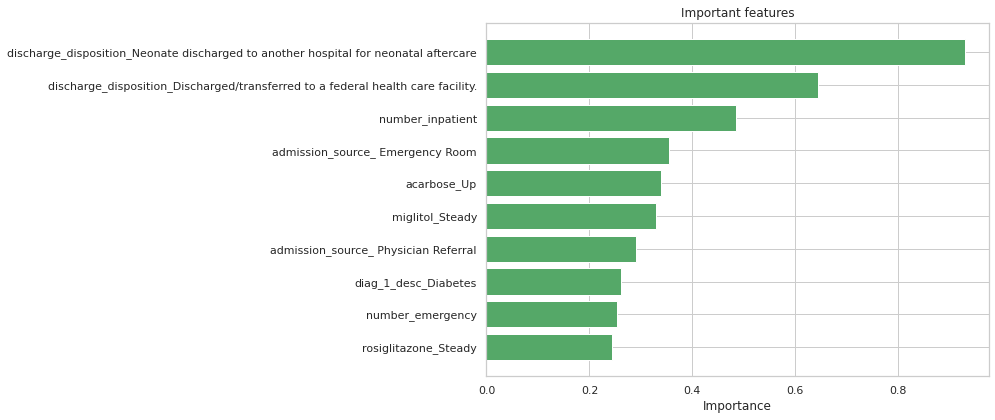

In [145]:
imp1 = imp[0:10]
plt.figure(figsize=(9, 6.5))
plt.barh(range(len(imp1))[::-1], [x[1]  for x in imp1] , align='center', color = 'g')
plt.yticks(range(len(imp1))[::-1], [x[0]  for x in imp1], )
plt.xlabel('Importance')
plt.title('Important features')
plt.show()

In [146]:
#Fit random classifier model
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_leaf=5, min_samples_split=5)
rf.fit(X_train, y_train)


#Get evaluation metrics on test set for random forest
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print("Random forest: ")
print("train mean accuracy: %f" %(rf_train_score))
print("test mean accuracy: %f" %(rf_test_score))

#Get confusion matrix and f1-score
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(confusion_matrix(y_test, y_pred))
print("f1-score: %f" %(f1))

#Get feature names
features = np.array(X_train.columns)
#Sort coefficients in ascending order
sorted_coeff_index = rf.feature_importances_.argsort()

#Get features with top 20 smallest and top 20 largest coefficients
print('Least important features (smallest coefs): \n{}\n'.format(features[sorted_coeff_index[:20]]))
print('Most important features (largest coefs): \n{}\n'.format(features[sorted_coeff_index[:-21:-1]]))

Random forest: 
train mean accuracy: 0.647611
test mean accuracy: 0.624122
[[7821  568]
 [4727  971]]
f1-score: 0.553448
Least important features (smallest coefs): 
['miglitol_Down' 'nateglinide_Down' 'tolazamide_Steady' 'nateglinide_Up'
 'chlorpropamide_Down' 'chlorpropamide_Steady' 'chlorpropamide_Up'
 'tolazamide_No' 'troglitazone_Steady' 'acetohexamide_No'
 'acetohexamide_Steady' 'troglitazone_No' 'miglitol_Up' 'miglitol_Steady'
 'miglitol_No' 'acarbose_Up' 'tolbutamide_No' 'tolbutamide_Steady'
 'citoglipton_No' 'glyburide-metformin_Down']

Most important features (largest coefs): 
['number_inpatient' 'number_diagnoses' 'number_emergency'
 'num_medications' 'age' 'num_lab_procedures' 'number_outpatient'
 'time_in_hospital' 'num_procedures'
 'admission_source_Transfer from a hospital' 'diabetesMed'
 'admission_source_ Emergency Room' 'admission_type_Not Available'
 'admission_type_Elective' 'A1Cresult'
 'discharge_disposition_Discharged/transferred to another short term hospital'
 '

In [147]:
rf = RandomForestClassifier(max_features = 'sqrt', max_samples = 0.8, class_weight = "balanced")

rf_params = {"max_depth": [5, 7, 10],
             "n_estimators": range(100, 250, 30)}

rf_cv_model = GridSearchCV(rf, rf_params, cv=2, n_jobs=-1, scoring = 'roc_auc', verbose=2).fit(X_train, y_train)
print(rf_cv_model.best_score_)
print(rf_cv_model.best_params_)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
0.6468603476454382
{'max_depth': 10, 'n_estimators': 190}


In [151]:
rf_model = rf_cv_model.best_estimator_
#rf_model.fit(data_trainn_x, data_trainn_y)
#Get evaluation metrics on test set for random forest
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)
print("Random forest: ")
print("train mean accuracy: %f" %(rf_train_score))
print("test mean accuracy: %f" %(rf_test_score))

#Get confusion matrix and f1-score
y_pred = rf_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(confusion_matrix(y_test, y_pred))
print("f1-score: %f" %(f1))

#Get feature names
features = np.array(X_train.columns)
#Sort coefficients in ascending order
sorted_coeff_index = rf_model.feature_importances_.argsort()

#Get features with top 20 smallest and top 20 largest coefficients
print('Least important features (smallest coefs): \n{}\n'.format(features[sorted_coeff_index[:20]]))
print('Most important features (largest coefs): \n{}\n'.format(features[sorted_coeff_index[:-21:-1]]))

predicted_prob = rf_model.predict_proba(X_test)[:, 1]
predicted = rf_model.predict(X_test)
AUC_RF = roc_auc_score(y_test, predicted_prob)
print('AUC_RF = ', AUC_RF)
f1_pos = f1_score(y_test, predicted)
f1_neg = f1_score([0 if x == 1 else 1 for x in y_test], [0 if x == 1 else 1 for x in predicted])
print('F1_POS = ', f1_pos, 'F1_NEG = ', f1_neg)
HARMONIC_F1_RF = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print('Harmonic_F1_RF =', HARMONIC_F1_RF)

Random forest: 
train mean accuracy: 0.651569
test mean accuracy: 0.607865
[[5165 3224]
 [2300 3398]]
f1-score: 0.611143
Least important features (smallest coefs): 
['troglitazone_No' 'chlorpropamide_Down' 'examide_No' 'citoglipton_No'
 'miglitol_Down' 'glimepiride-pioglitazone_No' 'metformin-pioglitazone_No'
 'discharge_disposition_Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere'
 'metformin-pioglitazone_Steady' 'acetohexamide_No' 'acetohexamide_Steady'
 'glyburide-metformin_Down' 'metformin-rosiglitazone_Steady'
 'metformin-rosiglitazone_No' 'admission_source_Normal Delivery'
 'miglitol_Up' 'chlorpropamide_Up' 'glipizide-metformin_Steady'
 'troglitazone_Steady' 'glipizide-metformin_No']

Most important features (largest coefs): 
['number_inpatient' 'number_diagnoses' 'num_medications'
 'num_lab_procedures' 'age' 'number_outpatient' 'number_emergency'
 'time_in_hospital' 'admission_source_Transfer from a hospital'
 'diabetesMed' 'num_procedures'

In [154]:
imp = []
for colName, importance in zip(np.array(X_train.columns), rf_model.feature_importances_) :
    imp.append((colName, importance))

imp = [(key, val) for key, val in sorted(imp, key = lambda x : x[1], reverse = True)]

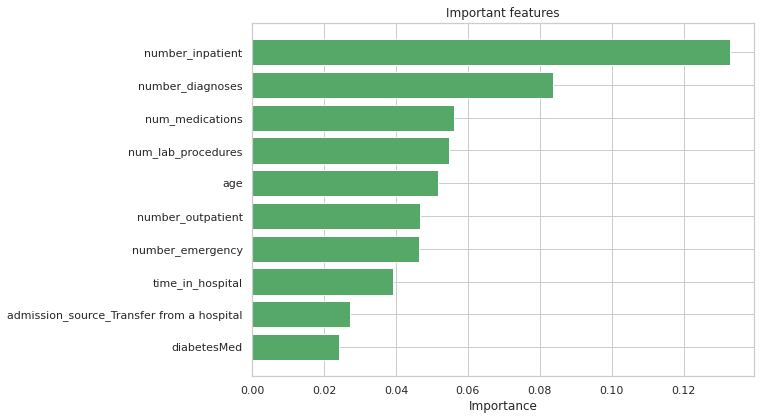

In [155]:
imp1 = imp[0:10]
plt.figure(figsize=(9, 6.5))
plt.barh(range(len(imp1))[::-1], [x[1]  for x in imp1] , align='center', color = 'g')
plt.yticks(range(len(imp1))[::-1], [x[0]  for x in imp1], )
plt.xlabel('Importance')
plt.title('Important features')
plt.show()

# **Predicting early readmission (<30 as 1, >30 + No as 0)**

In [156]:
fin_df['readmitted'].value_counts()

0    41898
2    22240
1     6293
Name: readmitted, dtype: int64

In [157]:
early_readmitted_df = fin_df.copy(deep=True)
replace_early_readmitted = lambda x: 1 if x==1 else 0

early_readmitted_df['early_readmitted_or_not'] = early_readmitted_df.apply(lambda row: replace_early_readmitted(row['readmitted']), axis=1)
early_readmitted_df['early_readmitted_or_not'].value_counts()

0    64138
1     6293
Name: early_readmitted_or_not, dtype: int64

In [158]:
early_readmitted_df.drop(columns='readmitted', inplace=True)
X = early_readmitted_df.drop(columns='early_readmitted_or_not')
y = early_readmitted_df['early_readmitted_or_not']

#Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [159]:
y_train.value_counts()

0    51304
1     5040
Name: early_readmitted_or_not, dtype: int64

# **Resample training set**



In [161]:
#Resample & fit model on training set

#Specify how many samples we want for <30 class and >30 class after resampling
over_strategy = {1:11590}
under_strategy = {0:29000}

#Oversample minority classes (<30, >30)
oversample = SMOTENC(categorical_features=range(0,138), sampling_strategy=over_strategy)

#Undersample majority class (No)
undersample = RandomUnderSampler(sampling_strategy=under_strategy)

steps = [('o', oversample), ('u', undersample)]
resampling = Pipeline(steps=steps)

X_train_res, y_train_res = resampling.fit_resample(X_train, y_train)

In [162]:
X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)
X_train_res

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,medical_specialty_high_freq,medical_specialty_low_freq,medical_specialty_missing,...,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed
0,0,0,0,1,0,1,0,1,0,0,...,2.0,2.2,0.0,0.0,1.0,0.000000,0.0,8.0,1.0,0.0
1,0,0,1,0,0,0,1,1,0,0,...,-0.5,0.4,0.0,0.0,0.0,0.000000,0.0,5.0,1.0,0.0
2,0,0,1,0,0,0,1,0,0,1,...,1.5,-0.8,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,-2.0
3,1,0,0,0,0,1,0,0,0,1,...,1.5,-0.3,0.0,0.0,1.0,0.333333,0.0,0.0,0.0,-2.0
4,0,0,1,0,0,0,1,0,0,1,...,-0.5,1.1,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40585,1,0,0,0,0,1,0,0,0,1,...,-0.5,0.8,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
40586,0,0,1,0,0,1,0,1,0,0,...,-0.5,-0.7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-2.0
40587,1,0,0,0,0,0,1,0,0,1,...,-0.5,0.6,0.0,0.0,0.0,0.333333,0.0,8.0,1.0,0.0
40588,0,0,1,0,0,1,0,0,0,1,...,-0.5,-0.4,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,0.0


Fit classification models on training set & evaluate on test set

**Logistic regression**

In [168]:
#Fit logistic regression model
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_res, y_train_res)

#Get final evaluation metrics on test set for logistic regression
lr_train_score = lr.score(X_train_res, y_train_res)
lr_test_score = lr.score(X_test, y_test)
print("Logistic regression: ")
print("train mean accuracy: %f" %(lr_train_score))
print("test mean accuracy: %f" %(lr_test_score))

#Get confusion matrix and f1-score
y_pred = lr.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(confusion_matrix(y_test, y_pred))
print("f1-score: %f" %(f1))


predicted_prob = lr.predict_proba(X_test)[:, 1]
predicted = lr.predict(X_test)
AUC_LR = roc_auc_score(y_test, predicted_prob)
print('AUC_LR = ', AUC_LR)
f1_pos = f1_score(y_test, predicted)
f1_neg = f1_score([0 if x == 1 else 1 for x in y_test], [0 if x == 1 else 1 for x in predicted])
print('F1_POS = ', f1_pos, 'F1_NEG = ', f1_neg)
HARMONIC_F1_LR = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print('HARMONIC_F1_LR = ', HARMONIC_F1_LR)



#Get feature names
features = np.array(X_train_res.columns)
#Sort coefficients in ascending order
sorted_coeff_index = lr.coef_[0].argsort()

#Get features with top 20 smallest and top 20 largest coefficients
print('Least important features (smallest coefs): \n{}\n'.format(features[sorted_coeff_index[:20]]))
print('Most important features (largest coefs): \n{}\n'.format(features[sorted_coeff_index[:-21:-1]]))

Logistic regression: 
train mean accuracy: 0.814363
test mean accuracy: 0.905800
[[12724   110]
 [ 1217    36]]
f1-score: 0.870478
AUC_LR =  0.5939276047599521
F1_POS =  0.05146533238027162 F1_NEG =  0.9504388422035481
HARMONIC_F1_LR =  0.097643371815363
Least important features (smallest coefs): 
['diag_2_desc_Musculoskeletal' 'diag_2_desc_Genitourinary'
 'diag_3_desc_Musculoskeletal' 'diag_1_desc_Genitourinary'
 'diag_2_desc_Respiratory' 'diag_3_desc_Genitourinary'
 'diag_3_desc_Respiratory' 'diag_2_desc_Injury' 'diag_1_desc_Respiratory'
 'diag_1_desc_Neoplasms' 'diag_3_desc_Digestive' 'diag_2_desc_Digestive'
 'diag_1_desc_Digestive' 'diag_3_desc_Injury' 'diag_3_desc_Neoplasms'
 'diag_1_desc_Other' 'diag_1_desc_Musculoskeletal' 'diag_1_desc_Injury'
 'diag_3_desc_Other' 'diag_2_desc_Other']

Most important features (largest coefs): 
['discharge_disposition_Discharged/transferred to a federal health care facility.'
 'chlorpropamide_No' 'nateglinide_No'
 'discharge_disposition_Neonate d

In [166]:
from sklearn.linear_model import SGDClassifier
for C in np.linspace(0.0001, 0.03, 30) :
    lr_model = SGDClassifier(alpha = C, learning_rate = 'adaptive', loss = 'log' , penalty = 'elasticnet', \
                             random_state = 24, class_weight = 'balanced', eta0 = 0.001,
                             early_stopping = True, n_iter_no_change = 3
                              )
    lr_model.fit(X_train_res, y_train_res)
    print(C, roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))
lr_model.fit(X_train_res, y_train_res)
predicted_prob = lr_model.predict_proba(X_test)[:, 1]
predicted = lr_model.predict(X_test)
AUC_LR = roc_auc_score(y_test, predicted_prob)
print('AUC_LR = ', AUC_LR)
f1_pos = f1_score(y_test, predicted)
f1_neg = f1_score([0 if x == 1 else 1 for x in y_test], [0 if x == 1 else 1 for x in predicted])
print('F1_POS = ', f1_pos, 'F1_NEG = ', f1_neg)
HARMONIC_F1_LR = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print('HARMONIC_F1_LR = ', HARMONIC_F1_LR)

0.0001 0.586095194814353
0.0011310344827586208 0.5861282151448025
0.0021620689655172413 0.5859884228607147
0.0031931034482758623 0.5857124450329649
0.004224137931034483 0.5855062389768996
0.005255172413793104 0.5853859728392546
0.006286206896551725 0.5850603090528812
0.007317241379310346 0.5847506890428842
0.008348275862068965 0.5843689342243723
0.009379310344827587 0.5839467590390202
0.010410344827586206 0.5837213999475903
0.011441379310344828 0.5833790083478629
0.01247241379310345 0.5830504218580409
0.013503448275862069 0.582766359956923
0.01453448275862069 0.5822397136695835
0.01556551724137931 0.5818561554808587
0.01659655172413793 0.58143814670255
0.017627586206896553 0.5810345027007645
0.018658620689655174 0.5806151880336811
0.019689655172413792 0.5802333710299893
0.020720689655172413 0.5799331409821353
0.021751724137931035 0.5795943561228336
0.022782758620689656 0.5791994180462138
0.023813793103448277 0.5788089573025362
0.0248448275862069 0.5784435571862997
0.025875862068965517 

In [167]:
lr_model = SGDClassifier(alpha = 0.02896896551724138, learning_rate = 'adaptive', loss = 'log' , penalty = 'elasticnet', \
                             random_state = 24, class_weight = 'balanced', eta0 = 0.001,
                             early_stopping = True, n_iter_no_change = 3
                              )
lr_model.fit(X_train_res, y_train_res)
predicted_prob = lr_model.predict_proba(X_test)[:, 1]
predicted = lr_model.predict(X_test)
AUC_LR = roc_auc_score(y_test, predicted_prob)
print('AUC_LR = ', AUC_LR)
f1_pos = f1_score(y_test, predicted)
f1_neg = f1_score([0 if x == 1 else 1 for x in y_test], [0 if x == 1 else 1 for x in predicted])
print('F1_POS = ', f1_pos, 'F1_NEG = ', f1_neg)
HARMONIC_F1_LR = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print('HARMONIC_F1_LR = ', HARMONIC_F1_LR)

AUC_LR =  0.5767310706136346
F1_POS =  0.18171444872343462 F1_NEG =  0.7289136700845816
HARMONIC_F1_LR =  0.2909072166578242


In [169]:
imp = []
for colName, importance in zip(np.array(X_train.columns), lr.coef_[0]) :
    imp.append((colName, importance))

imp = [(key, val) for key, val in sorted(imp, key = lambda x : x[1], reverse = True)]

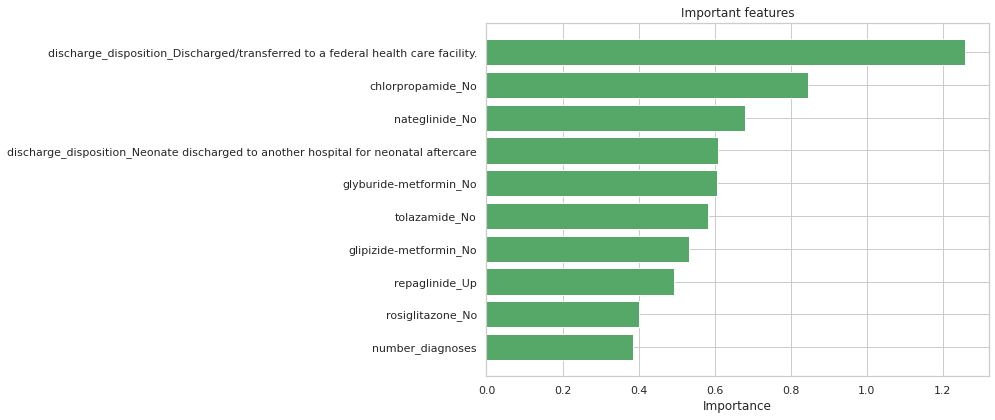

In [170]:
imp1 = imp[0:10]
plt.figure(figsize=(9, 6.5))
plt.barh(range(len(imp1))[::-1], [x[1]  for x in imp1] , align='center', color = 'g')
plt.yticks(range(len(imp1))[::-1], [x[0]  for x in imp1], )
plt.xlabel('Importance')
plt.title('Important features')
plt.show()

Random forest

In [171]:
#Fit random classifier model
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_leaf=5, min_samples_split=5)
rf.fit(X_train_res, y_train_res)


#Get evaluation metrics on test set for random forest
rf_train_score = rf.score(X_train_res, y_train_res)
rf_test_score = rf.score(X_test, y_test)
print("Random forest: ")
print("train mean accuracy: %f" %(rf_train_score))
print("test mean accuracy: %f" %(rf_test_score))

#Get confusion matrix and f1-score
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(confusion_matrix(y_test, y_pred))
print("f1-score: %f" %(f1))

#Get feature names
features = np.array(X_train.columns)
#Sort coefficients in ascending order
sorted_coeff_index = rf.feature_importances_.argsort()

#Get features with top 20 smallest and top 20 largest coefficients
print('Least important features (smallest coefs): \n{}\n'.format(features[sorted_coeff_index[:20]]))
print('Most important features (largest coefs): \n{}\n'.format(features[sorted_coeff_index[:-21:-1]]))

Random forest: 
train mean accuracy: 0.724858
test mean accuracy: 0.909278
[[12803    31]
 [ 1247     6]]
f1-score: 0.868571
Least important features (smallest coefs): 
['pioglitazone_Up' 'nateglinide_Down' 'pioglitazone_Down' 'nateglinide_Up'
 'chlorpropamide_Down' 'chlorpropamide_No' 'chlorpropamide_Steady'
 'chlorpropamide_Up' 'glimepiride_Down' 'troglitazone_Steady'
 'troglitazone_No' 'acetohexamide_No' 'acetohexamide_Steady' 'miglitol_Up'
 'miglitol_Steady' 'miglitol_No' 'miglitol_Down' 'acarbose_Up'
 'repaglinide_Up' 'acarbose_Steady']

Most important features (largest coefs): 
['number_diagnoses' 'age' 'A1Cresult'
 'discharge_disposition_Discharged/transferred to another short term hospital'
 'num_procedures' 'discharge_disposition_Discharged to home'
 'number_outpatient' 'num_medications' 'num_lab_procedures'
 'time_in_hospital' 'diag_1_desc_Respiratory' 'diag_2_desc_Genitourinary'
 'diag_3_desc_Respiratory' 'diag_2_desc_Respiratory' 'number_emergency'
 'number_inpatient' 'race

In [177]:
rf = RandomForestClassifier(max_features = 'sqrt', max_samples = 0.8, class_weight = "balanced")

rf_params = {"max_depth": [5, 7, 10, 15],
"n_estimators": range(100, 250, 30)}

rf_cv_model = GridSearchCV(rf, rf_params, cv=2, n_jobs=-1, scoring = 'roc_auc', verbose=2).fit(X_train_res, y_train_res)                                                                                              
print(rf_cv_model.best_score_)
print(rf_cv_model.best_params_)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
0.7112467674273303
{'max_depth': 15, 'n_estimators': 160}


In [178]:
rf_model = rf_cv_model.best_estimator_
#rf_model.fit(data_trainn_x, data_trainn_y)
#Get evaluation metrics on test set for random forest
rf_train_score = rf_model.score(X_train_res, y_train_res)
rf_test_score = rf_model.score(X_test, y_test)
print("Random forest: ")
print("train mean accuracy: %f" %(rf_train_score))
print("test mean accuracy: %f" %(rf_test_score))

#Get confusion matrix and f1-score
y_pred = rf_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(confusion_matrix(y_test, y_pred))
print("f1-score: %f" %(f1))

#Get feature names
features = np.array(X_train.columns)
#Sort coefficients in ascending order
sorted_coeff_index = rf_model.feature_importances_.argsort()

#Get features with top 20 smallest and top 20 largest coefficients
print('Least important features (smallest coefs): \n{}\n'.format(features[sorted_coeff_index[:20]]))
print('Most important features (largest coefs): \n{}\n'.format(features[sorted_coeff_index[:-21:-1]]))

predicted_prob = rf_model.predict_proba(X_test)[:, 1]
predicted = rf_model.predict(X_test)
AUC_RF = roc_auc_score(y_test, predicted_prob)
print('AUC_RF = ', AUC_RF)
f1_pos = f1_score(y_test, predicted)
f1_neg = f1_score([0 if x == 1 else 1 for x in y_test], [0 if x == 1 else 1 for x in predicted])
print('F1_POS = ', f1_pos, 'F1_NEG = ', f1_neg)
HARMONIC_F1_RF = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print('Harmonic_F1_RF =', HARMONIC_F1_RF)

Random forest: 
train mean accuracy: 0.837201
test mean accuracy: 0.760062
[[10373  2461]
 [  919   334]]
f1-score: 0.798094
Least important features (smallest coefs): 
['metformin-pioglitazone_Steady' 'glimepiride-pioglitazone_No'
 'metformin-rosiglitazone_No' 'citoglipton_No' 'examide_No'
 'discharge_disposition_Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere'
 'metformin-pioglitazone_No' 'metformin-rosiglitazone_Steady'
 'miglitol_Down' 'acetohexamide_Steady' 'admission_source_Normal Delivery'
 'chlorpropamide_Down' 'chlorpropamide_Up' 'nateglinide_Down'
 'glyburide-metformin_Up' 'acetohexamide_No' 'miglitol_Up'
 'troglitazone_No' 'glipizide-metformin_No' 'troglitazone_Steady']

Most important features (largest coefs): 
['number_diagnoses' 'age' 'num_medications' 'num_lab_procedures'
 'num_procedures' 'A1Cresult' 'time_in_hospital'
 'discharge_disposition_Discharged/transferred to another short term hospital'
 'number_outpatient' 'discharge_di

In [180]:
imp = []
for colName, importance in zip(np.array(X_train.columns), rf_model.feature_importances_) :
    imp.append((colName, importance))

imp = [(key, val) for key, val in sorted(imp, key = lambda x : x[1], reverse = True)]

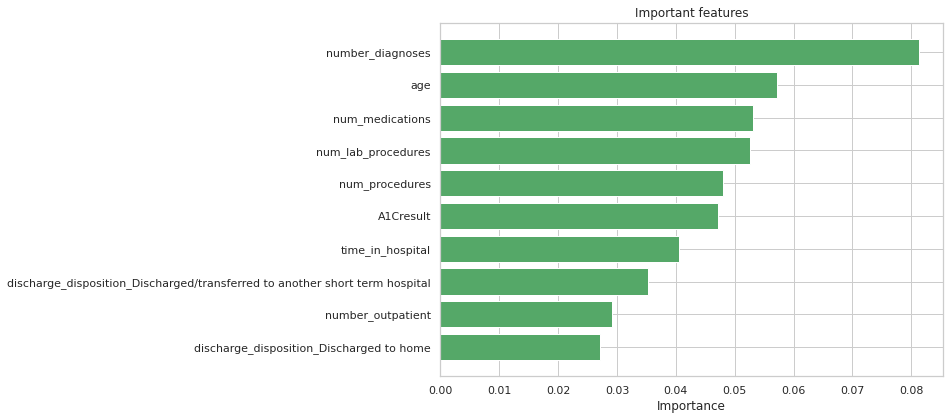

In [181]:
imp1 = imp[0:10]
plt.figure(figsize=(9, 6.5))
plt.barh(range(len(imp1))[::-1], [x[1]  for x in imp1] , align='center', color = 'g')
plt.yticks(range(len(imp1))[::-1], [x[0]  for x in imp1], )
plt.xlabel('Importance')
plt.title('Important features')
plt.show()

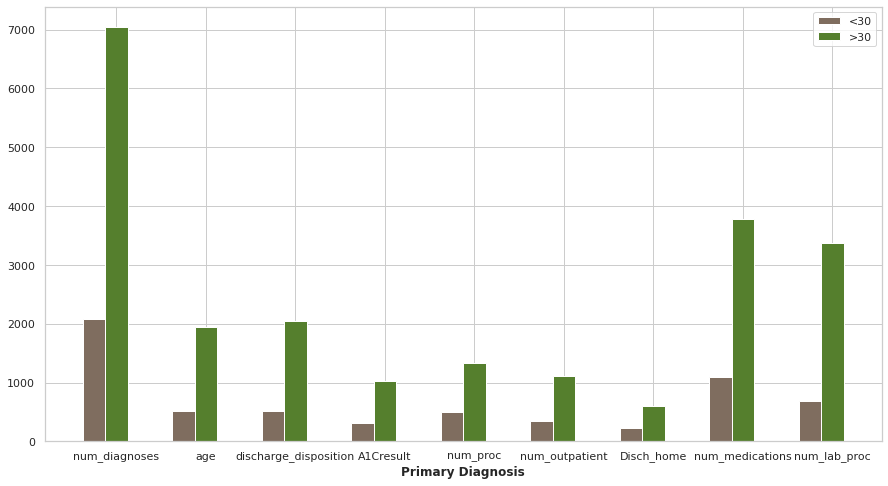

In [182]:
# Plot Readmission vs Primary Diagnosis
data1 = data[['number_diagnoses','readmitted']]
data1

fig,ax = plt.subplots()
fig.set_size_inches(15, 8)

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = data_diag_cnt1
bars2 = data_diag_cnt2
bars3 = data_diag_cnt3
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='<30')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='>30')
#plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='NO')
 
# Add xticks on the middle of the group bars
plt.xlabel('Primary Diagnosis', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['num_diagnoses', 'age', 'discharge_disposition', 'A1Cresult', 'num_proc',
                                                      'num_outpatient','Disch_home','num_medications','num_lab_proc'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70431 entries, 0 to 70430
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     70431 non-null  int64 
 1   race                      70431 non-null  object
 2   gender                    70431 non-null  object
 3   age                       70431 non-null  int64 
 4   time_in_hospital          70431 non-null  int64 
 5   medical_specialty         70431 non-null  object
 6   num_lab_procedures        70431 non-null  int64 
 7   num_procedures            70431 non-null  int64 
 8   num_medications           70431 non-null  int64 
 9   number_outpatient         70431 non-null  int64 
 10  number_emergency          70431 non-null  int64 
 11  number_inpatient          70431 non-null  int64 
 12  number_diagnoses          70431 non-null  int64 
 13  max_glu_serum             70431 non-null  int64 
 14  A1Cresult             

In [184]:
important_features = ['number_diagnoses' 'age' 'A1Cresult'
 'discharge_disposition_Discharged/transferred to another short term hospital'
 'num_procedures' 'number_outpatient'
 'discharge_disposition_Discharged to home' 'num_lab_procedures'
 'num_medications' 'time_in_hospital' 'diag_1_desc_Respiratory'
 'diag_2_desc_Respiratory' 'diag_3_desc_Genitourinary' 'number_inpatient'
 'diag_2_desc_Genitourinary' 'number_emergency' 'diag_3_desc_Diabetes'
 'diag_1_desc_Genitourinary' 'insulin_No' 'diag_1_desc_Digestive']

In [185]:
# Loop bar plots to show relationship of readmitted to other categorical variables
for i in important_features:
    if i != 'readmitted':
        readm_cnt = ('readm_cnt_'+ i)
        read = ('read_' + i)
        pcts = ('pcts_' + i)
        unique_val_cnt = len(data[i].unique())  
        
        # Get counts of each value in i grouped by readmitted; show 0 values
        readm_cnt = data.groupby(['readmitted', i]).readmitted.count()
        levels = [readm_cnt.index.levels[0].values, readm_cnt.index.levels[1].values]
        new_index = pd.MultiIndex.from_product(levels, names=readm_cnt.index.names)
        readm_cnt = readm_cnt.reindex(new_index, fill_value=0)
        readm_cnt = readm_cnt.reset_index(name='counts')
        
        # Get percentages
        read = readm_cnt.groupby(['readmitted', i]).agg({'counts': 'sum'})
        read1 = readm_cnt.groupby([i]).agg({'counts': 'sum'})
        pcts = read.div(read1) * 100
        pcts = pcts.rename(columns = {'counts':'pcts'})
        pcts = pcts.reset_index()

        # Plot
        fig,ax = plt.subplots()

        # Values of each group
        bars1 = pcts.loc[pcts.readmitted=='NO','pcts'].tolist()
        bars2 = pcts.loc[pcts.readmitted=='>30','pcts'].tolist()
        bars3 = pcts.loc[pcts.readmitted=='<30','pcts'].tolist()

        bars = np.add(bars1, bars2).tolist()
        r = list(range(len(data[i].unique())))

        names = pcts[i]
        barWidth = 0.7

        plt.bar(r, bars1, color='#6EAE9B', edgecolor='white', width=barWidth)
        plt.bar(r, bars2, bottom=bars1, color='#D08B47', edgecolor='white', width=barWidth)
        plt.bar(r, bars3, bottom=bars, color='#D9B608', edgecolor='white', width=barWidth)

        plt.xticks(r, names, rotation='vertical')
        plt.xlabel(i)

        plt.title('% of readmission by ' + i)
        plt.legend(['No','>30','<30'])
        plt.show()

KeyError: ignored